Variables of filenames

In [1]:
#PLAINTREE FILES NAMES
directory='/Users/julnow/gsi/inz/jupyter/'
fileName = directory + 'PlainTree10K_ml_DCM_12gev.root'

# Importing the Libraries

**Numpy** is a powerful library that makes working with python more efficient, so we will import it and use it as np in the code. **Pandas** is another useful library that is built on numpy and has two great objects *series* and *dataframework*. Pandas works great for *data ingestion* and also has *data visualization* features. **Matplotlib** and **Seaborn** come handy in plotting and visualizing the data. From **Hipe4ml** we import **TreeHandler** and with the help of this function we will import our *Analysis Tree* to our notebook. We will also need some functions of **Scipy** for fittintg. **Seaborn** will be used to prepare the heatmap of the correlations of all variables. **gc** - garbage collector will get rid of unnecessary data; **os** will create the folder for graphs.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sn
#from hipe4ml.tree_handler import TreeHandler
#from hipe4ml import plot_utils
from matplotlib.patches import ConnectionPatch
from scipy.stats import binned_statistic as b_s
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from sklearn import datasets, linear_model
import gc
import os
from enum import Enum
import itertools

To import the root files with simulated data as PlainTrees into Panda's dataframes format we use the function from **CBM_ML_LAMBDA_LIBRARY** prepared by Shahid.

In [3]:
%%capture
# Shahid's library for importing roottrees
!git clone https://github.com/shahidzk1/CBM_ML_Lambda_Library.git
%cd CBM_ML_Lambda_Library
!git pull origin main
!pip install -r requirements.txt
!python setup.py install
from CBM_ML import tree_importer, plot_tools, KFPF_lambda_cuts

In [21]:
# We import three root files into our jupyter notebook
particles = tree_importer.tree_importer(fileName,'plain_tree',7)
particles.columns = particles.columns.str.replace('Complex_', '')
# bckgr = bckgr[(bckgr['Candidates_generation'] < 1)
#                  & ((bckgr['Candidates_mass'] > lower5SigmaCutBckgr)
#                  & (bckgr['Candidates_mass'] < lower5SigmaCutSign) | (bckgr['Candidates_mass']>upper5SigmaCutSign) 
gc.collect()
#let's add velocity field
particles['v'] = particles['l']/particles['t']
particles = particles.dropna()
particles.iloc[0:10,:]

eta           l      mass         p        pT       phi        px  \
0  1.772989  726.968933  0.938272  3.081436  1.017269 -2.501104 -0.815650   
1  2.434091  789.583557  0.938272  2.045768  0.355999 -1.127488  0.152699   
2  1.923849  794.463928  0.139570  0.925076  0.264560 -2.625532 -0.230107   
3  2.448442  753.877502  0.938272  8.301641  1.424350 -0.910986  0.873079   
4  2.299000  752.853638  0.938272  1.316773  0.261665 -2.482023 -0.206782   
5  2.859857  763.913025  0.938272  3.449825  0.393898 -1.800607 -0.089727   
6  2.885593  763.653015  0.139570  1.869297  0.208047 -1.574484 -0.000767   
7  2.840546  747.993958  0.139570  2.500303  0.291011 -1.223433  0.099066   
8  3.017349  793.801025  0.000511  6.246289  0.609811 -1.780552 -0.126976   
9  3.101090  794.461365  0.938272  6.787242  0.609614 -1.850472 -0.168281   

         py        pz  rapidity          t     pid    q          v  
0 -0.607907  2.908679  1.488253  25.257862  2212.0  1.0  28.781887  
1 -0.321587  2.014555  1.446963  26.548641  2212.0  1.0  29.741016  
2 -0.130549  0.886438  1.806840  26.454737   211.0  1.0  30.031065  
3 -1.125392  8.178537  2.271433  25.385580  2212.0  1.0  29.697077  
4 -0.160342  1.290513  1.093517  25.362499  2212.0  1.0  29.683733  
5 -0.383542  3.427263  1.928807  27.897562  2212.0  1.0  27.382788  
6 -0.208045  1.857684  2.701191  25.378315  -211.0  1.0  30.090769  
7 -0.273630  2.483310  2.737813  25.116238   211.0  1.0  29.781290  
8 -0.596445  6.216451  3.017349  26.594879    11.0  1.0  29.847891  
9 -0.585928  6.759809  2.498553  28.626184  2212.0  1.0  27.752960

Let's check the insides of the dataframe

In [22]:
#pid codes of particles
class Pid(Enum):
    ELECTRON = 11
    POSITRON = -11
    PROTON = 2212 
    NEG_MUON = -13
    POS_MUON = 13
    NEG_PION = -211
    POS_PION = 211 
    NEG_KAON = -321
    POS_KAON = 321 
    
#number of all particles in dataset
numberAllParticles = particles.shape[0]
percentageOtherParticles = 100 
print ('number of all particles: ' + str(numberAllParticles))
for particle in Pid:
    percentage = particles[particles['pid']==particle.value].shape[0] / numberAllParticles * 100
    percentageOtherParticles -= percentage
    print('percantage of ' + str(particle) + ' = ' + str(round(percentage, 2)) + ' %')
print('percantage of other particles = ' + str(round(percentageOtherParticles, 2)) + ' %')

number of all particles: 470834
percantage of Pid.ELECTRON = 10.41 %
percantage of Pid.POSITRON = 2.16 %
percantage of Pid.PROTON = 28.39 %
percantage of Pid.NEG_MUON = 2.1 %
percantage of Pid.POS_MUON = 2.32 %
percantage of Pid.NEG_PION = 27.11 %
percantage of Pid.POS_PION = 23.85 %
percantage of Pid.NEG_KAON = 0.41 %
percantage of Pid.POS_KAON = 2.33 %
percantage of other particles = 0.92 %


In [23]:
#lets set data labels in latex format
print(particles.columns)
names=['$\eta$', '$l$','$mass$','$p$', 
       '$p_T$', '$\phi$',  '$p_x$', 'p_y', '$p_z$', 
       '$rapidity$', '$t$', 'pid', '$q$', '$v$']
#xlabels with unit
xNames=['$\eta$', '$l$ (mm)','$mass$ $(GeV/c^2)$','$p$ $(GeV/c)$', 
       '$p_T$ $(GeV/c)$', '$\phi$ $(rad)$',  '$p_x$ $(GeV/c)$', '$p_y$ $(GeV/c)$', '$p_z$ $(GeV/c)$', 
       '$rapidity$', '$t$ (ps)', 'pid', '$q$ (sign)', '$v$ (mm/ps)']

Index(['eta', 'l', 'mass', 'p', 'pT', 'phi', 'px', 'py', 'pz', 'rapidity', 't',
       'pid', 'q', 'v'],
      dtype='object')


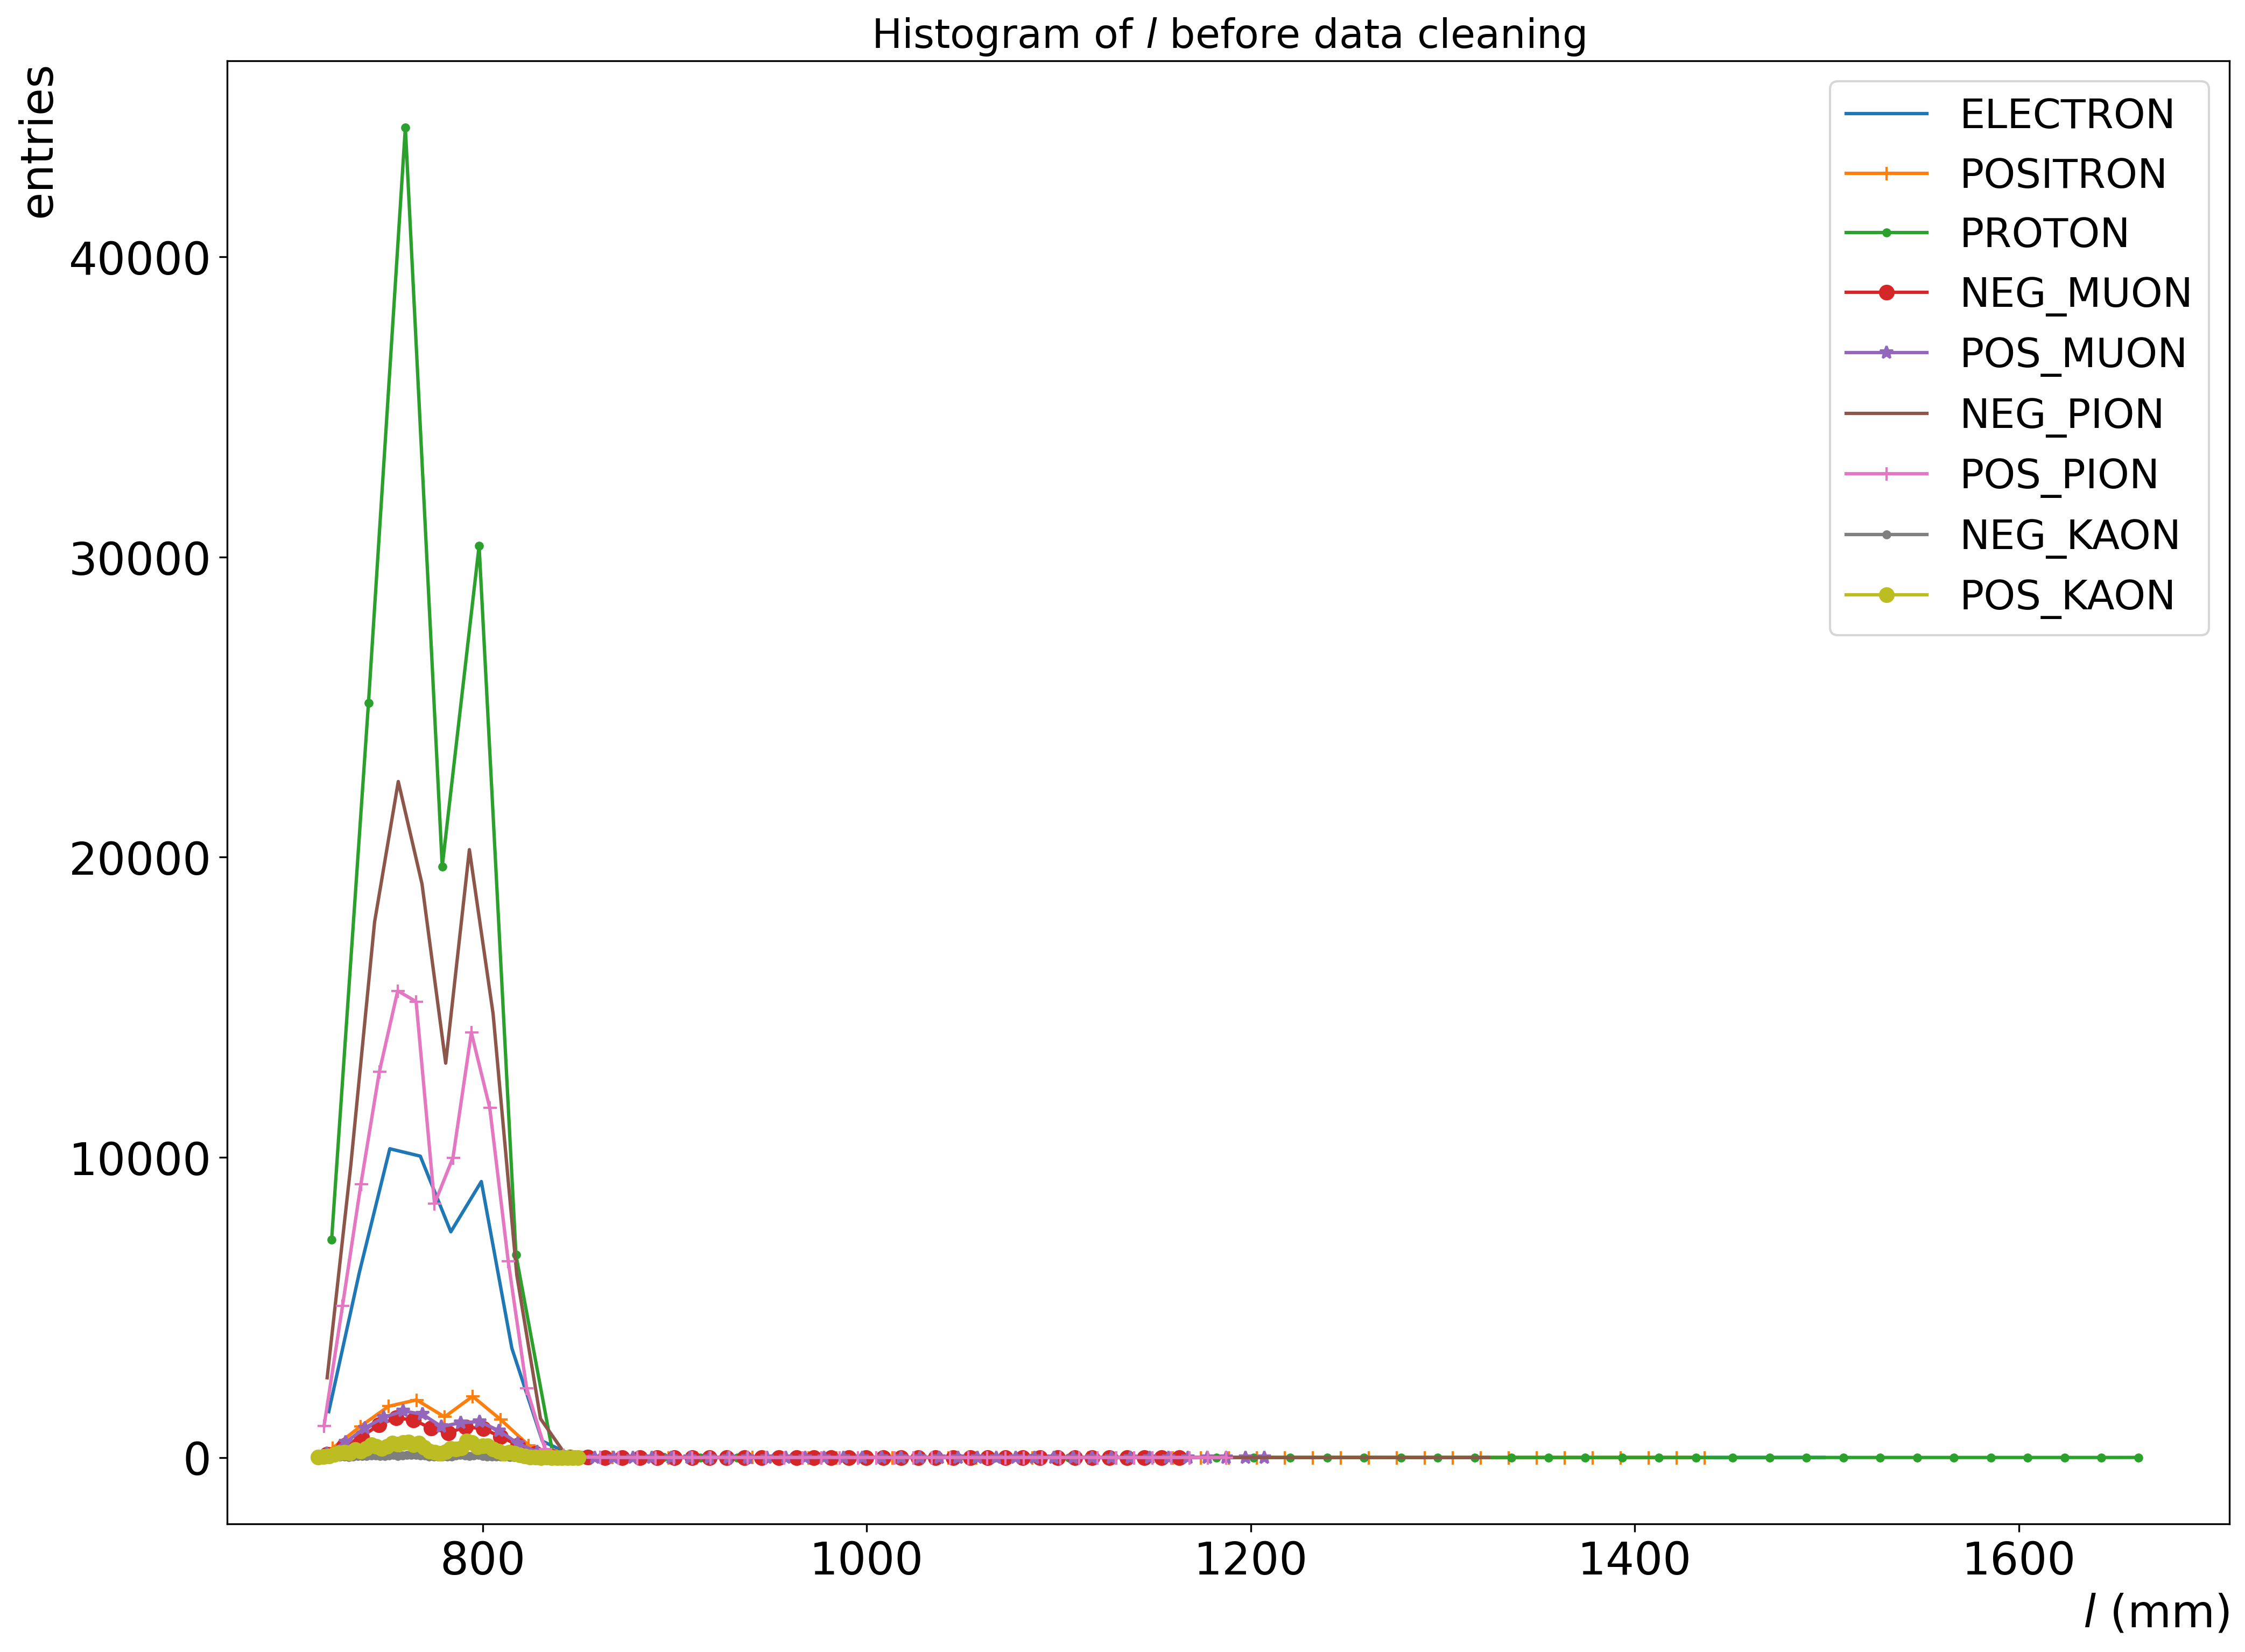

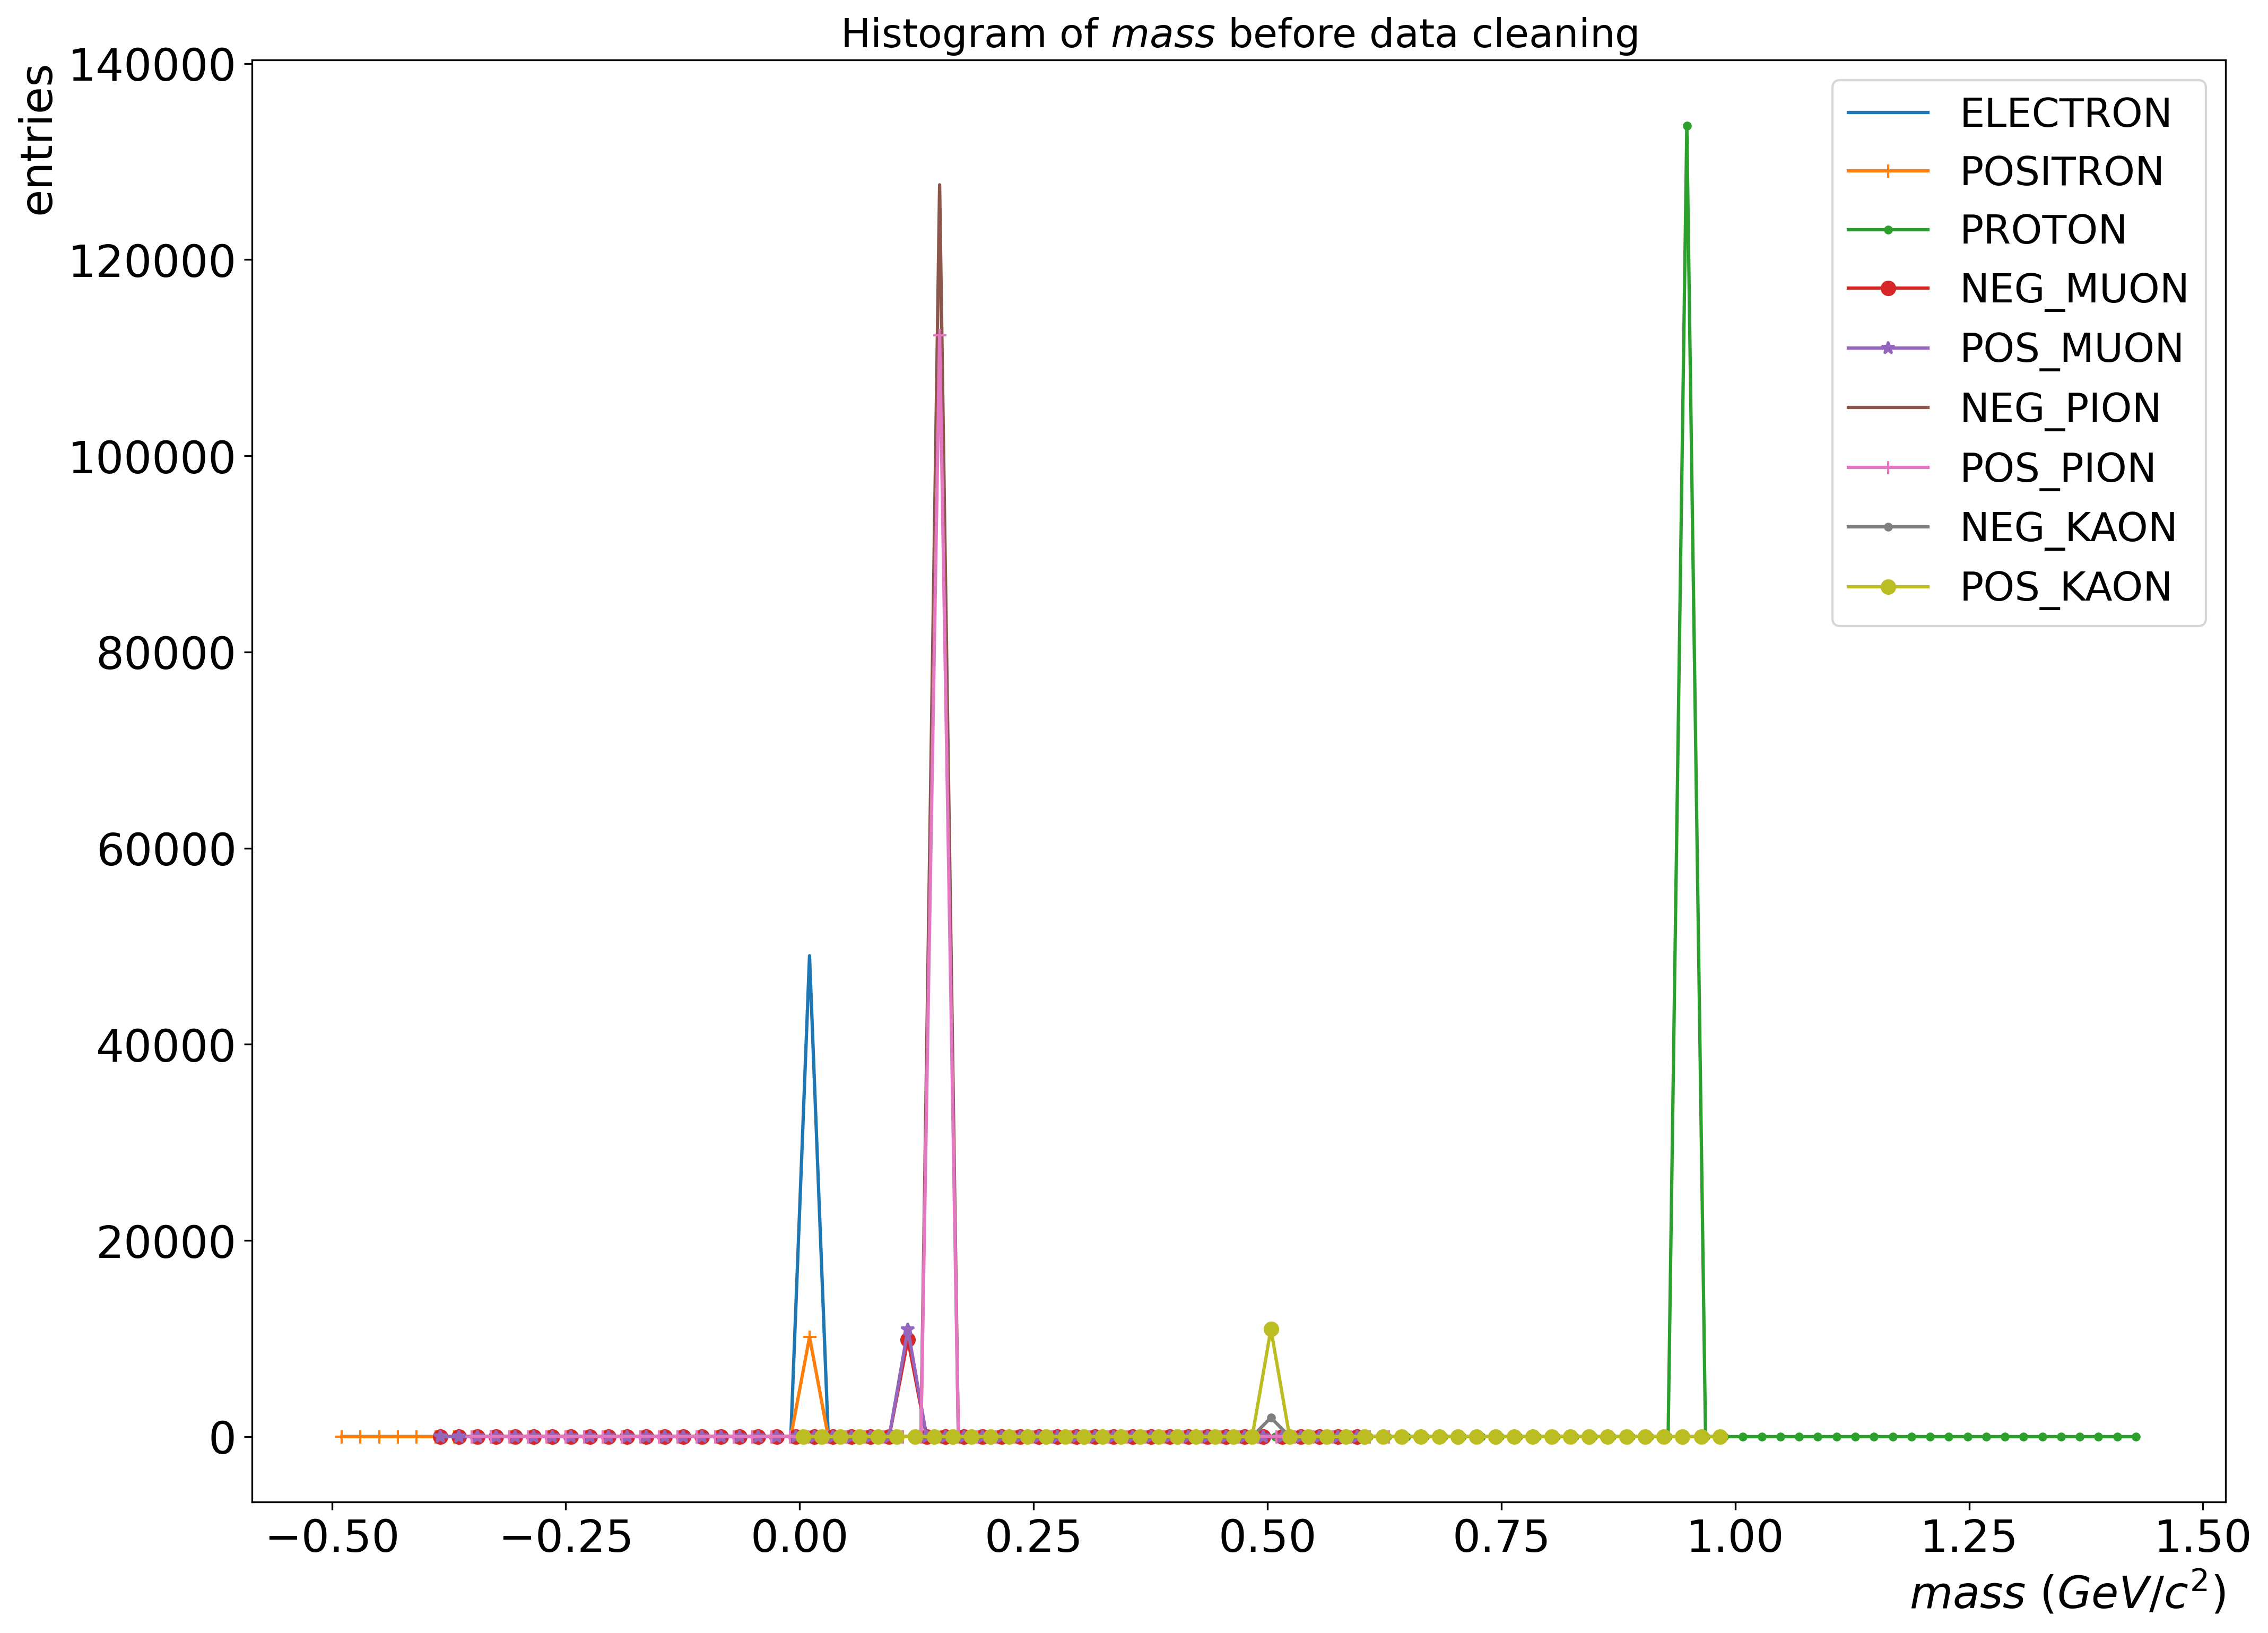

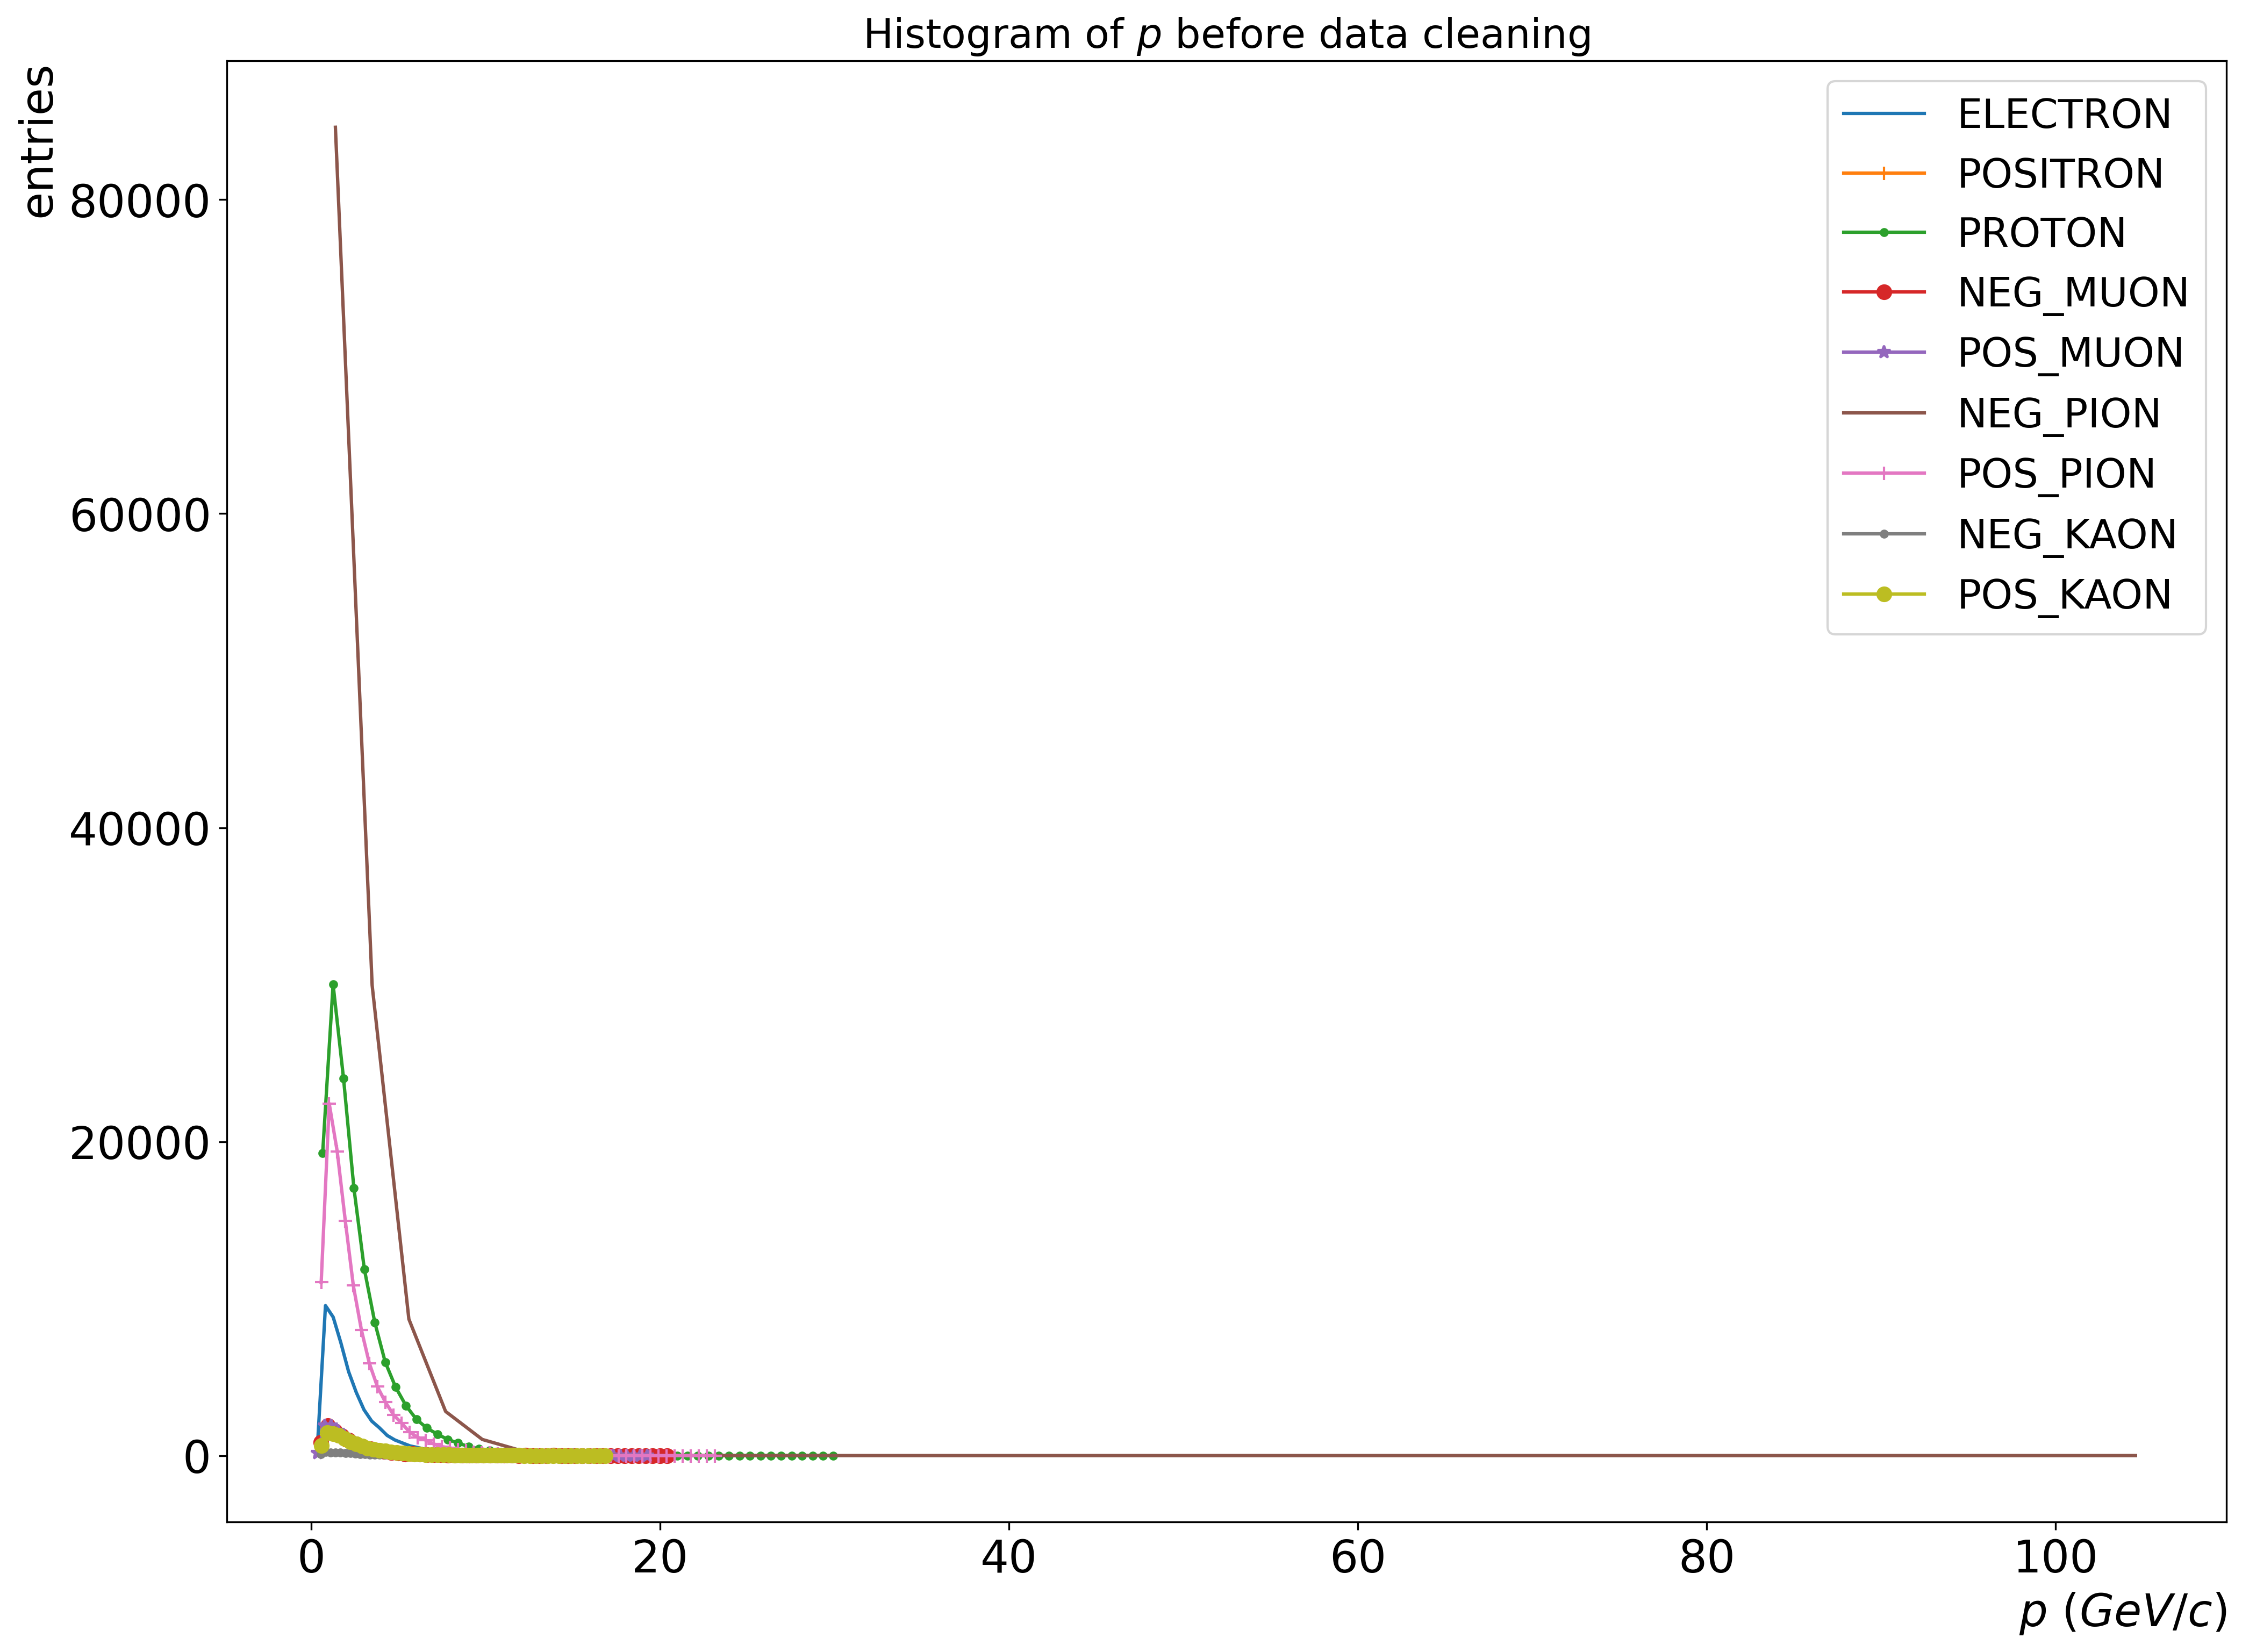

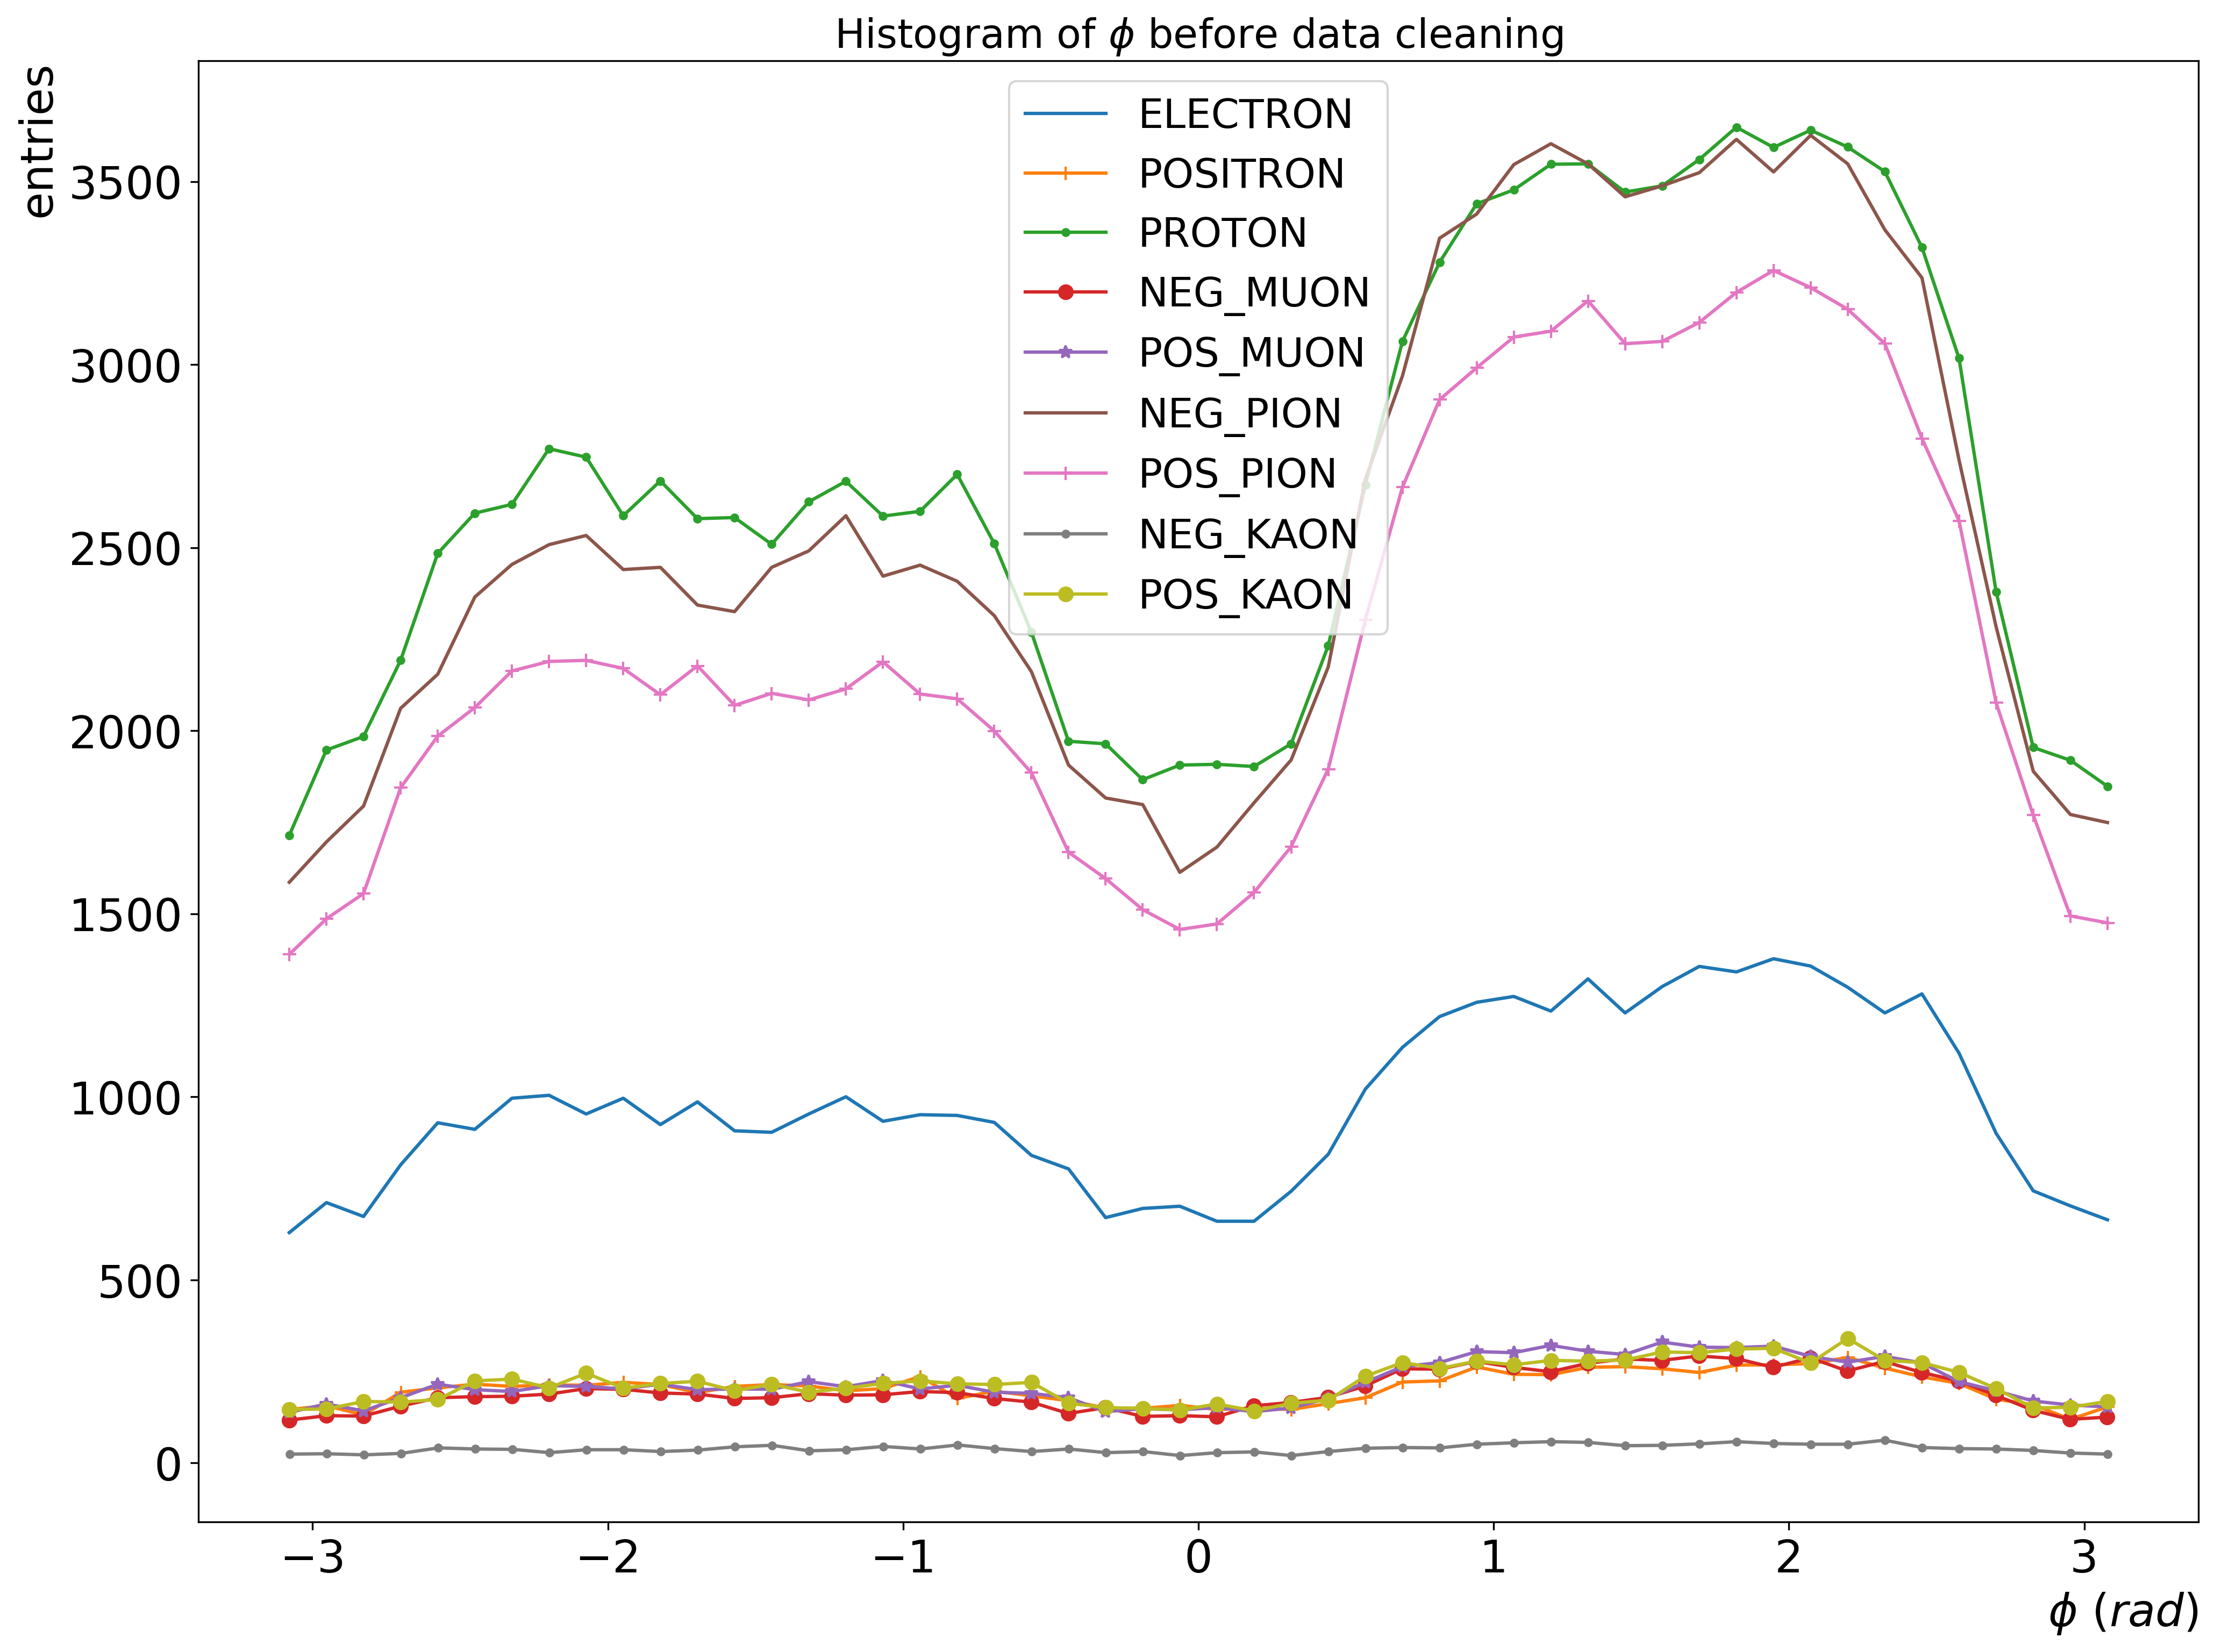

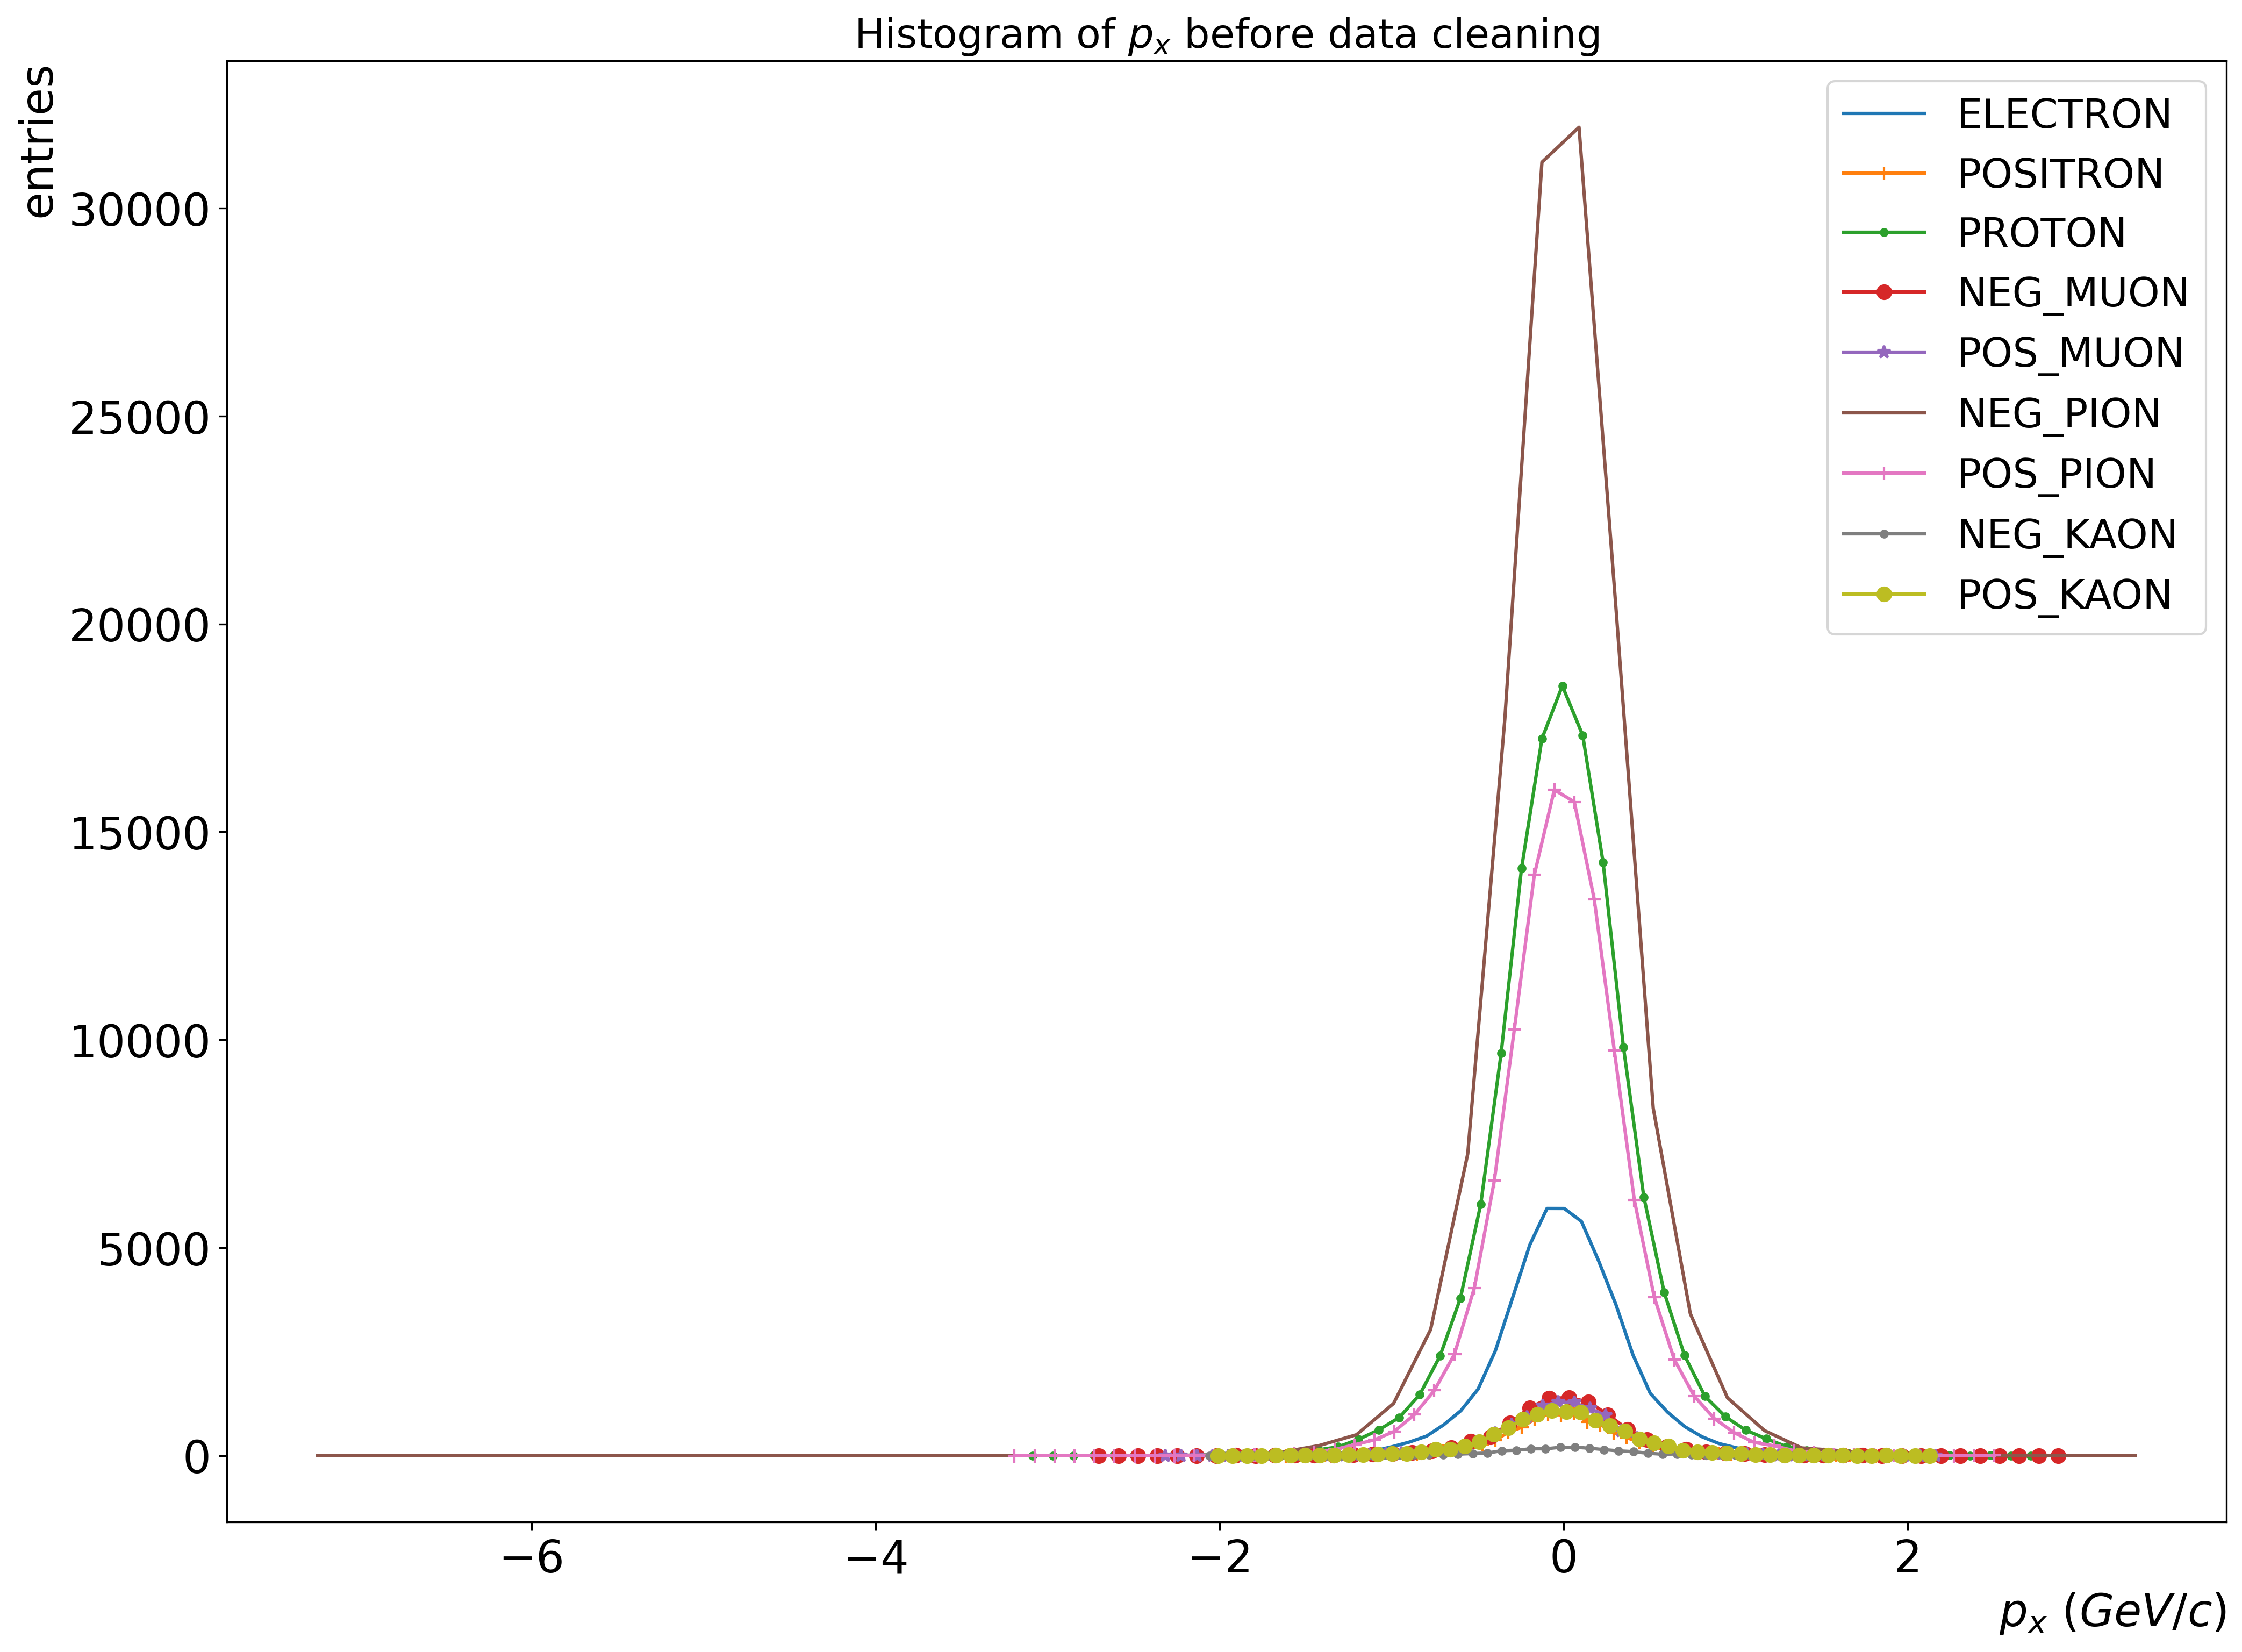

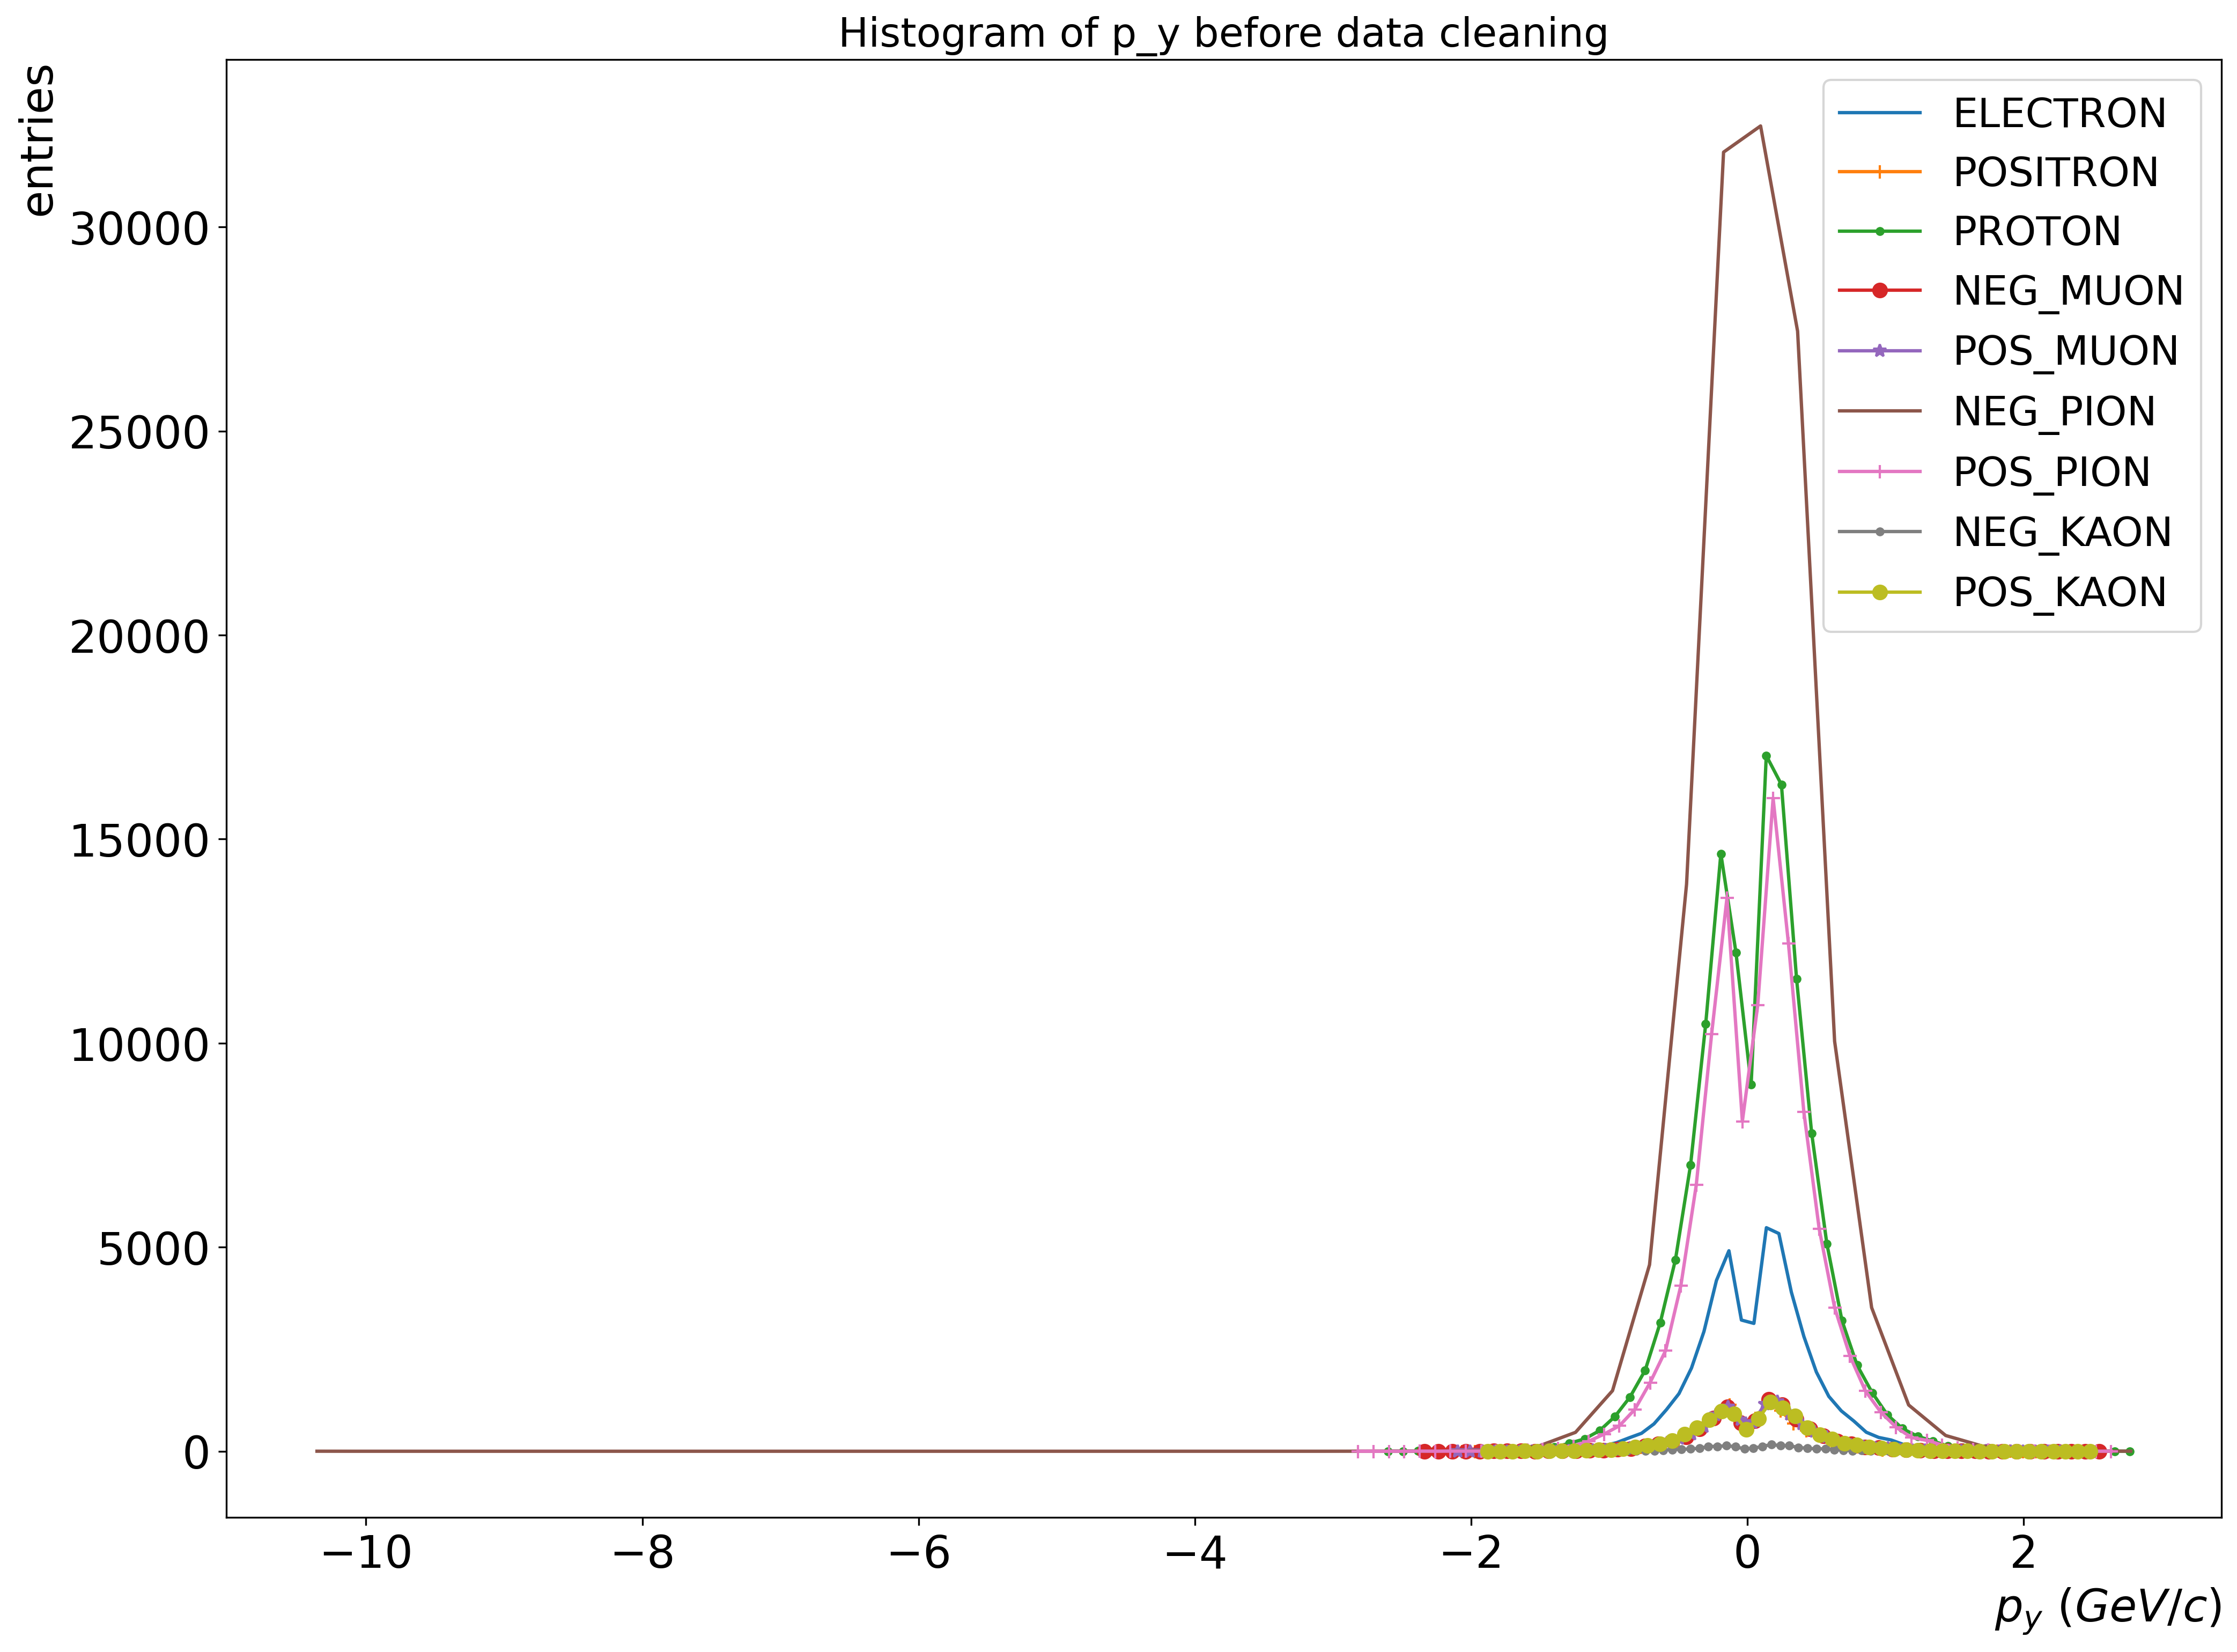

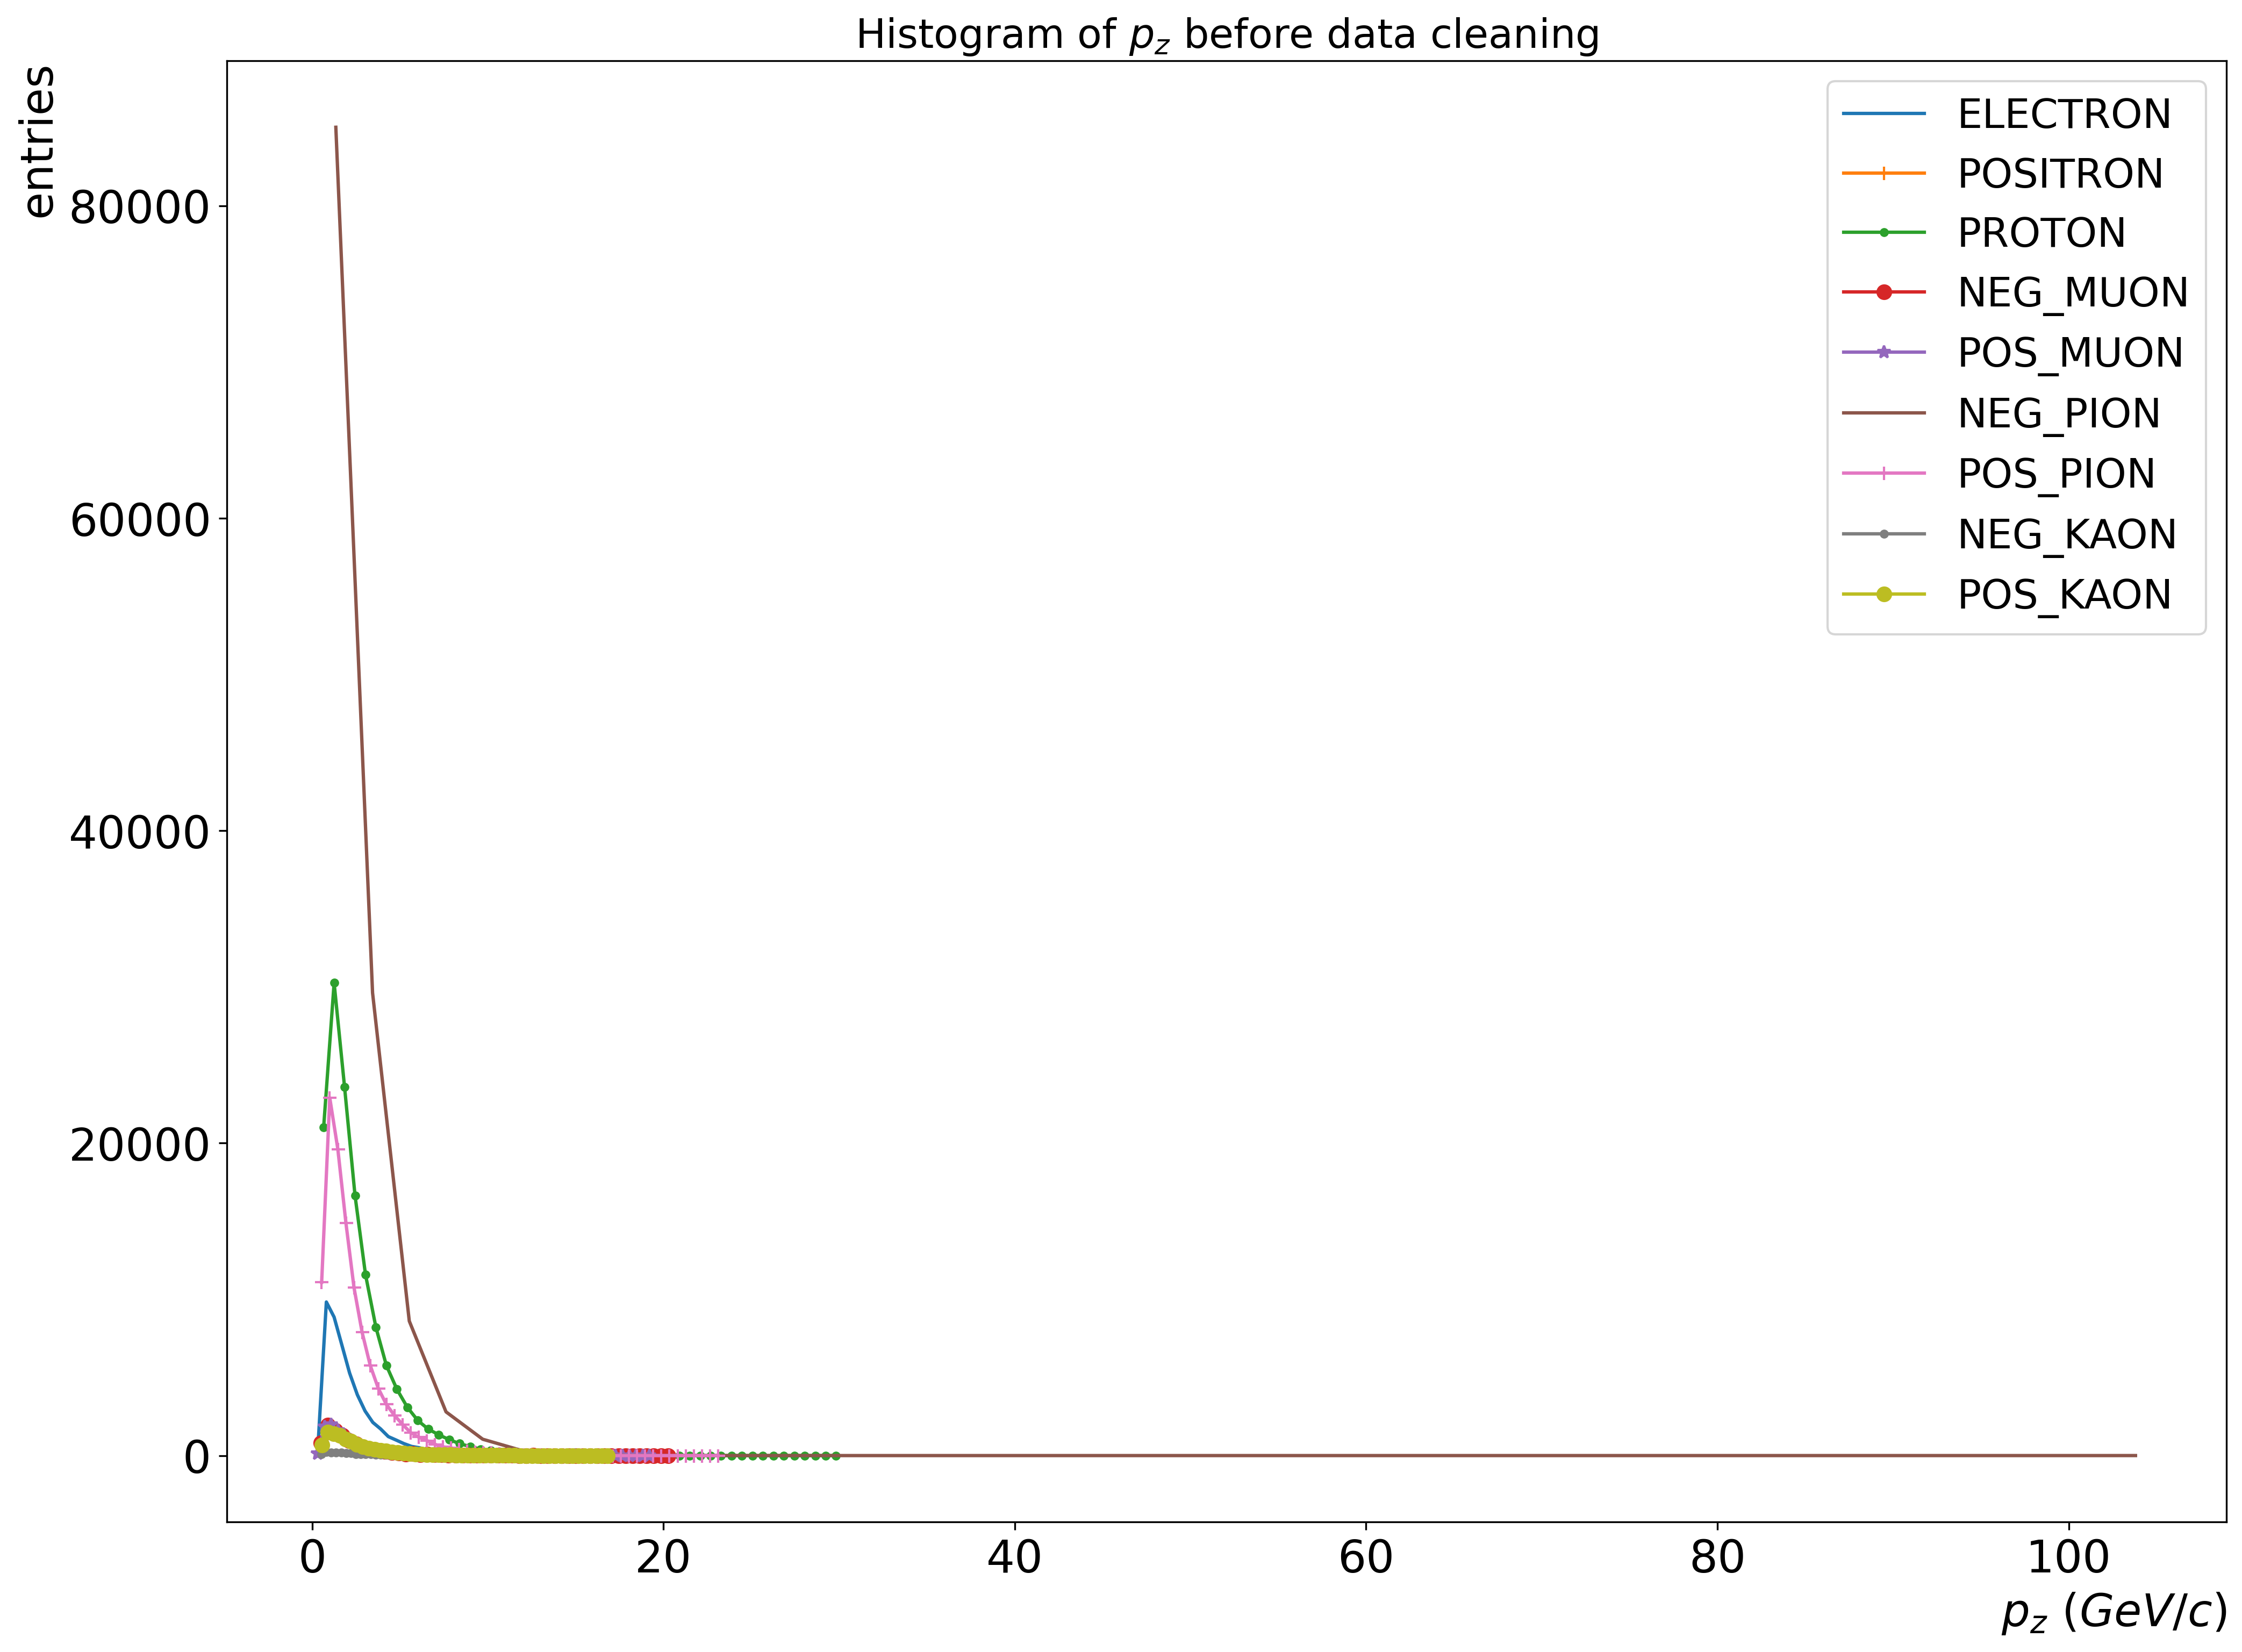

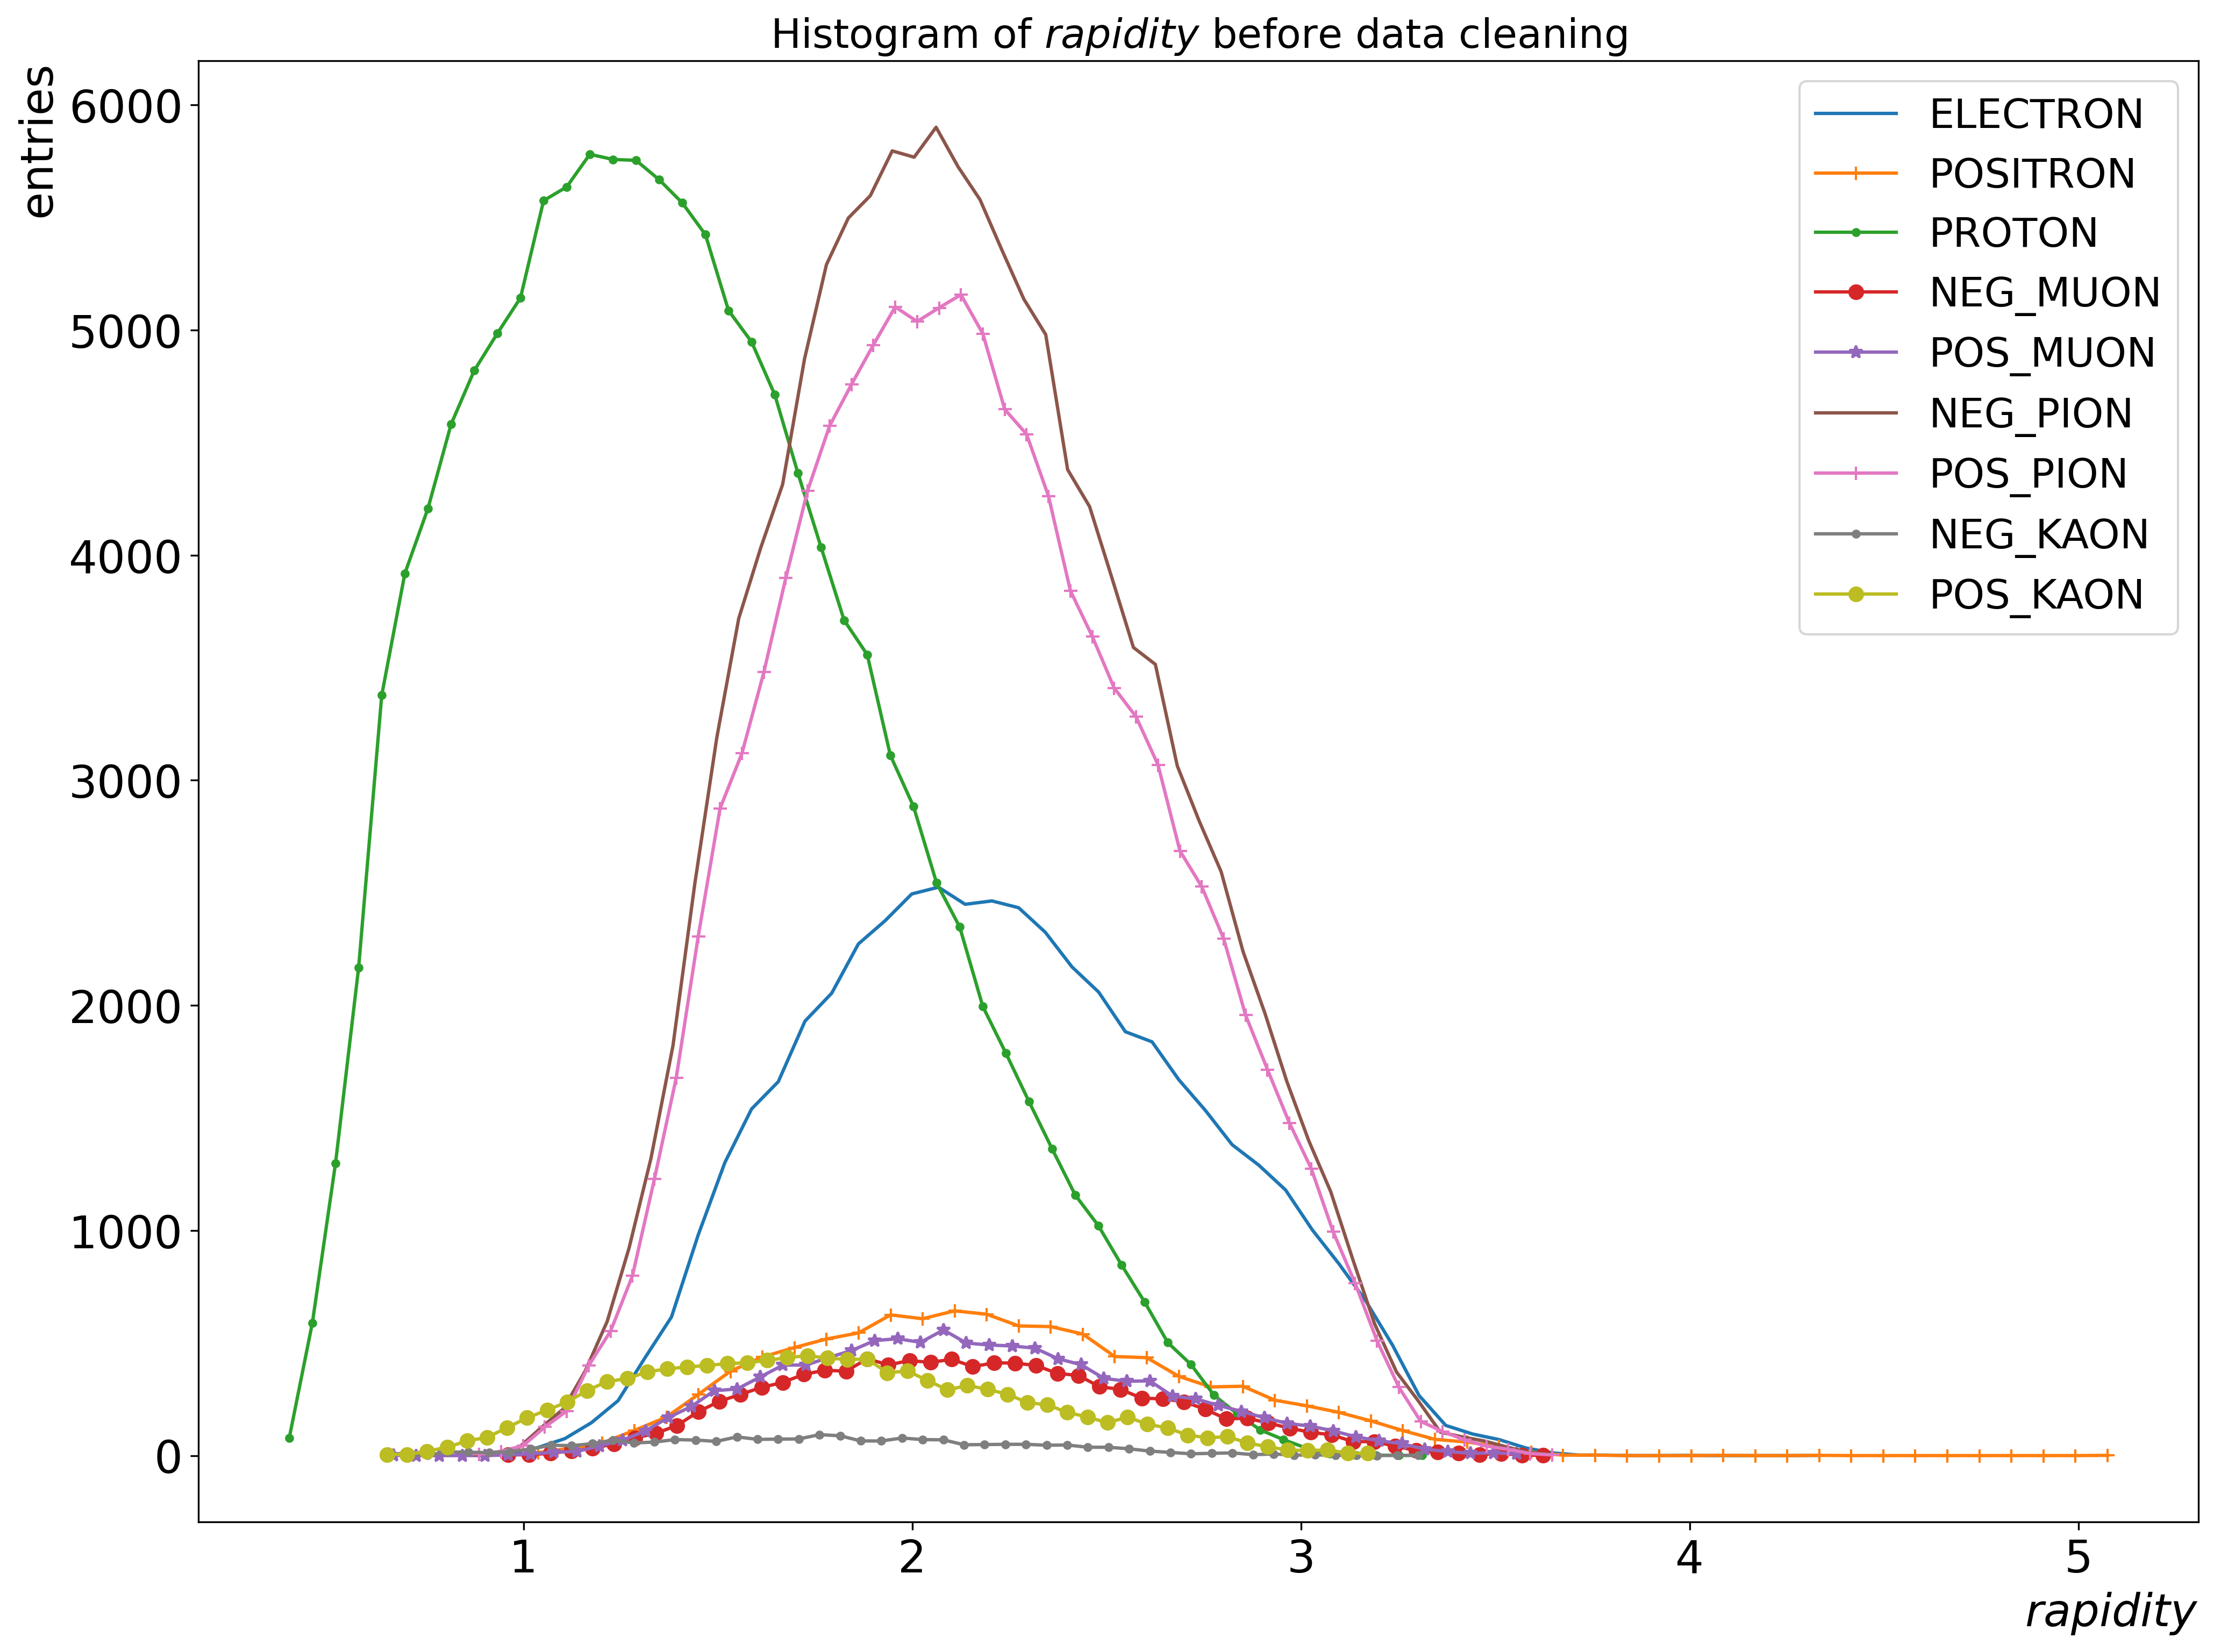

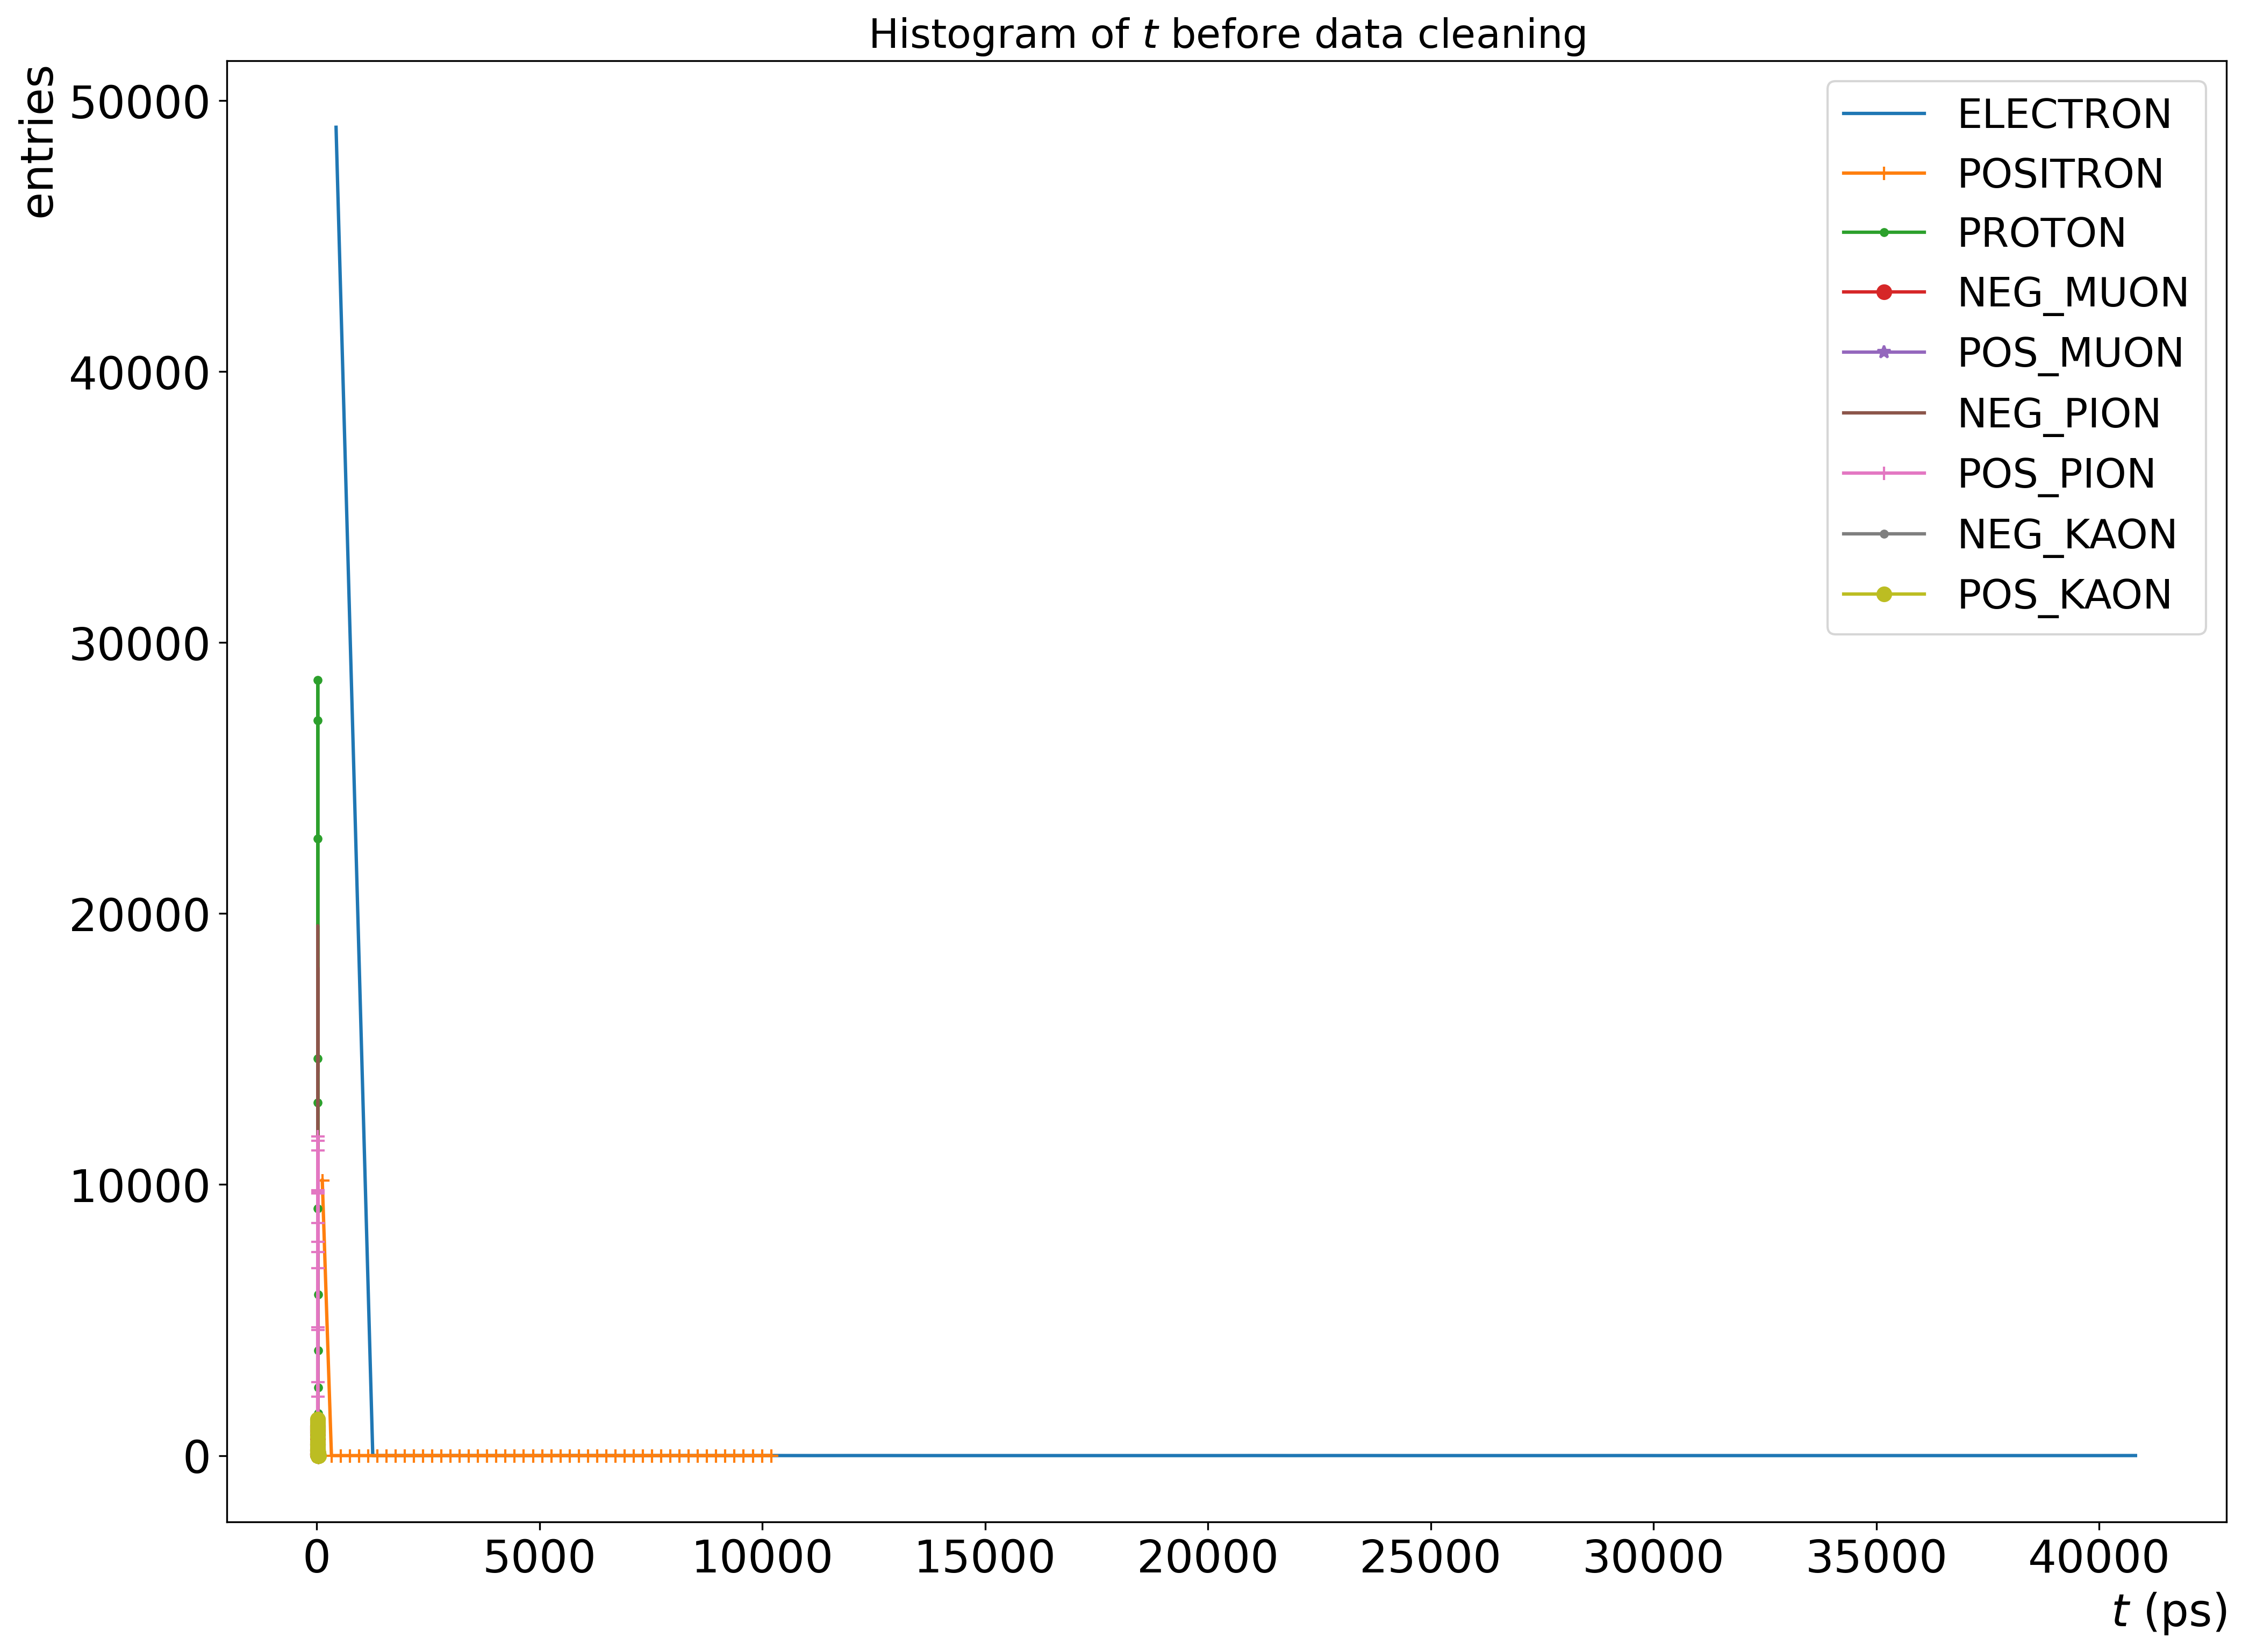

In [24]:
if not os.path.exists(directory+'img/histograms'):
    os.makedirs(directory+'img/histograms')
if not os.path.exists(directory+'img/histograms/before_cleaning'):
    os.makedirs(directory+'img/histograms/before_cleaning')
#we save all figures to pdf
pdf_beforeCleaning = PdfPages(directory+'img/histograms/histogramsBeforeCleaning.pdf') 
#chart before data cleaning
for i in particles.columns:  
    name = names[particles.columns.get_loc(i)]
    xName = xNames[particles.columns.get_loc(i)]  
    fig, ax = plt.subplots(figsize=(16, 12), dpi = 300)
    marker = itertools.cycle((',', '+', '.', 'o', '*'))
    #axis settings
    plt.title('Histogram of ' + name + ' before data cleaning', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=20, labelcolor='black')
    
    plt.xlabel(xName, fontsize=20, loc='right')
    plt.ylabel("entries", fontsize=20, loc='top')
    plt.title('Histogram of ' + name + ' before data cleaning', fontsize=18)
    for particle in Pid:
#         if (particle == Pid.ELECTRON or particle == Pid.POSITRON or
#             particle == Pid.PROTON or particle == Pid.NEG_MUON or particle == Pid.POS_MUON):
#             continue
        name = str(particle).replace('Pid.', '')
        counts, bin_edges = np.histogram(particles[particles['pid']==particle.value][i], bins=50)
        bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
        ax.plot(bin_centers, counts, linestyle='-',marker = next(marker), label = name)
    ax.legend(fontsize = 18)
    fig.savefig(directory+"img/histograms/before_cleaning/"+ particles[i].name + ".png")
    fig.savefig(pdf_beforeCleaning,format='pdf')
pdf_beforeCleaning.close()

# Data Cleaning
Sometimes a data set contains entries which are outliers or does not make sense. For example, infinite values or NaN entries. We clean the data by removing these entries. 

Similarly, CBM is a fixed target experiment so there are certain conditions which the data has to satisfy before it is considered as reliable data.So we apply certain limits on the data sets.

The values of these cuts are described: https://drive.google.com/file/d/1tb0FBRq4KgVu-VQZgpjA8ONbIGVCNOnE/view?usp=sharing https://github.com/julnow/JupyterNotebooks/blob/kaon/CBM%20K-short%20data%20cleaning.pdf

In [25]:
# #CUTS USED FOR DATA CLEANING
# #mass cuts for both bckgr and sign
# lowerMassCut = 0.279
# upperMassCut = 1.5
# #distance cuts
# #DCA
# lowerDcaCut = 0
# upperDcaCut = 100
# #l distance
# lowerLCut = -5
# upperLCut = 80
# #loverdl
# lowerLdlCut = -25
# upperLdlCut = 15000
# #coordinate cuts
# absXCut = 50
# absYCut = 50
# lowerZCut = -1
# upperZCut = 80
# #momentums cuts
# pzLowerCut = 0
# pUpperCut = 20
# ptUpperCut = 3
# #chi2
# #geo
# lowerChi2GeoCut = 0
# upperChi2GeoCut = 10000
# #topo
# lowerChi2TopoCut = 0
# upperChi2TopoCut = 100000
# #prim first
# lowerChi2PrimFirstCut = 0
# upperChi2PrimFirstCut = 3e7
# #prim second
# lowerChi2PrimSecondCut = 0
# upperChi2PrimSecondCut = 3e7
# #pseudorapidity cuts
# lowerEtaCut = 1.
# upperEtaCut = 6.5

We'll also show how much data we loose with each type of cut

In [26]:
# def clean_df(df):
#     # let's treat all the infinite, inf, values by nan and then we drop all the null entries
#     with pd.option_context('mode.use_inf_as_na', True):
#         df = df.dropna()
#     #Experimental constraints
#     #momentum
#     size_mom =  len(df[['pz', 'p', 'pT']])
#     is_good_mom = (df['pz'] > pzLowerCut) & (df['p']<pUpperCut) & (df['pT']<ptUpperCut)
#     percentage_mom = ( size_mom - len(df[is_good_mom]) ) / size_mom
#     print('with the momentum selection criteria we lose we loose ' + str(round(percentage_mom*100, 4)) + '% of entries')
#     #coordinates
#     size_coord  =  len(df[['x', 'y', 'z']])
#     is_good_coord = (abs(df['x']) < absXCut) & (abs(df['y']) < absYCut) & (df['z']>lowerZCut) & (df['z']<upperZCut)
#     percentage_coord = ( size_coord - len(df[is_good_coord]) ) / size_coord
#     print('with the coordinates selection criteria we lose we loose ' + str(round(percentage_coord*100, 2)) + '% of entries')
#     #eta
#     size_eta =  len(df[['eta']])
#     is_good_eta = (df['eta']>lowerEtaCut) & (df['eta']<upperEtaCut)
#     percentage_eta = ( size_eta - len(df[is_good_eta]) ) / size_eta
#     print('with the pseudorapidity selection criteria we lose we loose ' + str(round(percentage_eta*100, 3)) + '% of entries')
#     #DCA
#     size_distance =  len(df[['distance']])
#     is_good_distance = (df['distance'] > lowerDcaCut) & (df['distance'] < upperDcaCut) 
#     percentage_distance = ( size_distance - len(df[is_good_distance]) ) / size_distance
#     print('with the DCA selection criteria we lose we loose ' + str(round(percentage_distance*100, 3)) + '% of entries')
#     #l and loverld
#     size_l =  len(df[['l', 'loverdl']])
#     is_good_l = (df['l']>lowerLCut) & (df['l']<upperLCut) & (df['loverdl']>lowerLdlCut) & (df['loverdl']<upperLdlCut)
#     percentage_l = ( size_l - len(df[is_good_l]) ) / size_l
#     print('with the l and loverdl selection criteria we lose we loose ' + str(round(percentage_l*100, 2)) + '% of entries')
#     #chi2 geo and topo
#     size_chi2geo_topo =  len(df[['chi2geo', 'chi2topo']])
#     is_good_chi2geo_topo = (df['chi2geo']>lowerChi2GeoCut) & (df['chi2geo'] < upperChi2GeoCut) & (df['chi2topo'] > lowerChi2TopoCut) & (df['chi2topo'] < upperChi2TopoCut) 
#     percentage_chi2geo_topo = ( size_chi2geo_topo - len(df[is_good_chi2geo_topo]) ) / size_chi2geo_topo
#     print('with the chi^2 geo and topo selection criteria we lose we loose ' + str(round(percentage_chi2geo_topo*100, 2)) + '% of entries')
#     #chi^2 prim
#     size_daughters =  len(df[['chi2primfirst', 'chi2primsecond']])
#     is_good_daughters = (df['chi2primfirst']>lowerChi2PrimFirstCut) & (df['chi2primfirst'] < upperChi2PrimSecondCut) & (df['chi2primsecond']>lowerChi2PrimSecondCut) & (df['chi2primsecond']<upperChi2PrimFirstCut)
#     percentage_daughters = ( size_daughters - len(df[is_good_daughters]) ) / size_daughters
#     print('with the chi^2 prim selection criteria we lose we loose ' + str(round(percentage_daughters*100, 2)) + '% of entries')
#     #mass
#     size_mass =  len(df[['mass']])
#     is_good_mass = (df['mass']>lowerMassCut) & (df['mass']<upperMassCut)
#     percentage_mass = ( size_mass - len(df[is_good_mass]) ) / size_mass
#     print('with the mass selection criteria we lose we loose ' + str(round(percentage_mass*100, 4)) + '% of entries')

#     is_good_df = (is_good_mom) & (is_good_coord) & (is_good_eta) & (is_good_distance) & (is_good_l) & (is_good_chi2geo_topo) & (is_good_daughters) & (is_good_mass) 

#     return df[is_good_df]

In [27]:
# #we'll count how much data we loose
# bckgrCount = len(bckgr)
# signCount = len(sign)
# #we return to normal names while cleaning data
# print('for background: ')
# background = clean_df(bckgr)
# print('\nfor signal: ')
# signal = clean_df(sign)
# backgroundCount = len(background)
# signalCount = len(signal)
# #lets count how much data we lose
# backgroundDifference = bckgrCount-backgroundCount
# signalDifference = signCount-signalCount
# percentageBg = backgroundDifference/bckgrCount*100
# percentageSg = signalDifference/signCount*100
# #finally
# print('\nwe lost ' + str(backgroundDifference)+' background entries (' + str(round(percentageBg, 2)) + '%) and ' + str(signalDifference) + ' signal entries (' + str(round(percentageSg)) + '%)')
# gc.collect()

# Correlation
We find the correlation of all variables with signal and background candidates. We use the pearson correlation coefficient (linear correlation) for our analysis. It is defined as 
$$
\rho = \frac{COV(X,Y)}{\sigma_X \times \sigma_Y}
$$
Here, COV(X,Y) is the covariance of the variable X and Y, and $\sigma_X$ and $\sigma_Y$ are the standard deviations of the variables. Pearson co-efficient is useful for linear correlation but it fails to take into account outliers and non-linear correlation. $\rho \> 0$ means postive while the opposite means negative correlation between two variables. 

This correlation function comes in built in the pandas library so we are using it. This function can also find other non-linear correlation coefficients like kendall and spearman. 

In [64]:
variables_to_draw = ['eta',	'l', 'mass', 'p', 'pT', 'phi', 'px', 'py', 'pz', 'rapidity' ,'t', 'v', 'q']

In [65]:
if not os.path.exists(directory+'img/correlations'):
    os.makedirs(directory+'img/correlations')
def correlation_graph(df, variables, title):
    # The variables pid, isfrompv and issignal are not that much varying so we remove them
    new_df = df[variables]
    # Using the pandas correlation function corr we find the correlation
    df_correlation_all = new_df.corr(method='pearson')
    
    #The cosmetics of the graph
    fig, ax = plt.subplots(figsize=(20,15))  #figure size
    cmap = sn.diverging_palette(240, 10, as_cmap=True, n=200) #color map
    cax = sn.heatmap(df_correlation_all, annot=True,cbar_kws={"shrink": .5},  cmap=cmap,  vmin=-1, vmax=1, 
                 center=0)
    ax.set_xticks(np.arange(0, len(df_correlation_all.columns), step=1))
    ax.set_xticklabels(df_correlation_all.columns, fontsize=20, rotation =70)
    ax.set_yticklabels(df_correlation_all.columns, fontsize=20)
    ax.set_title(title, fontsize = 20)
    fig.tight_layout()
    fig.savefig(directory+'img/correlations/'+title.replace(' ', '_')+'.pdf')
    fig.savefig(directory+'img/correlations/'+title.replace(' ', '_')+'.png')

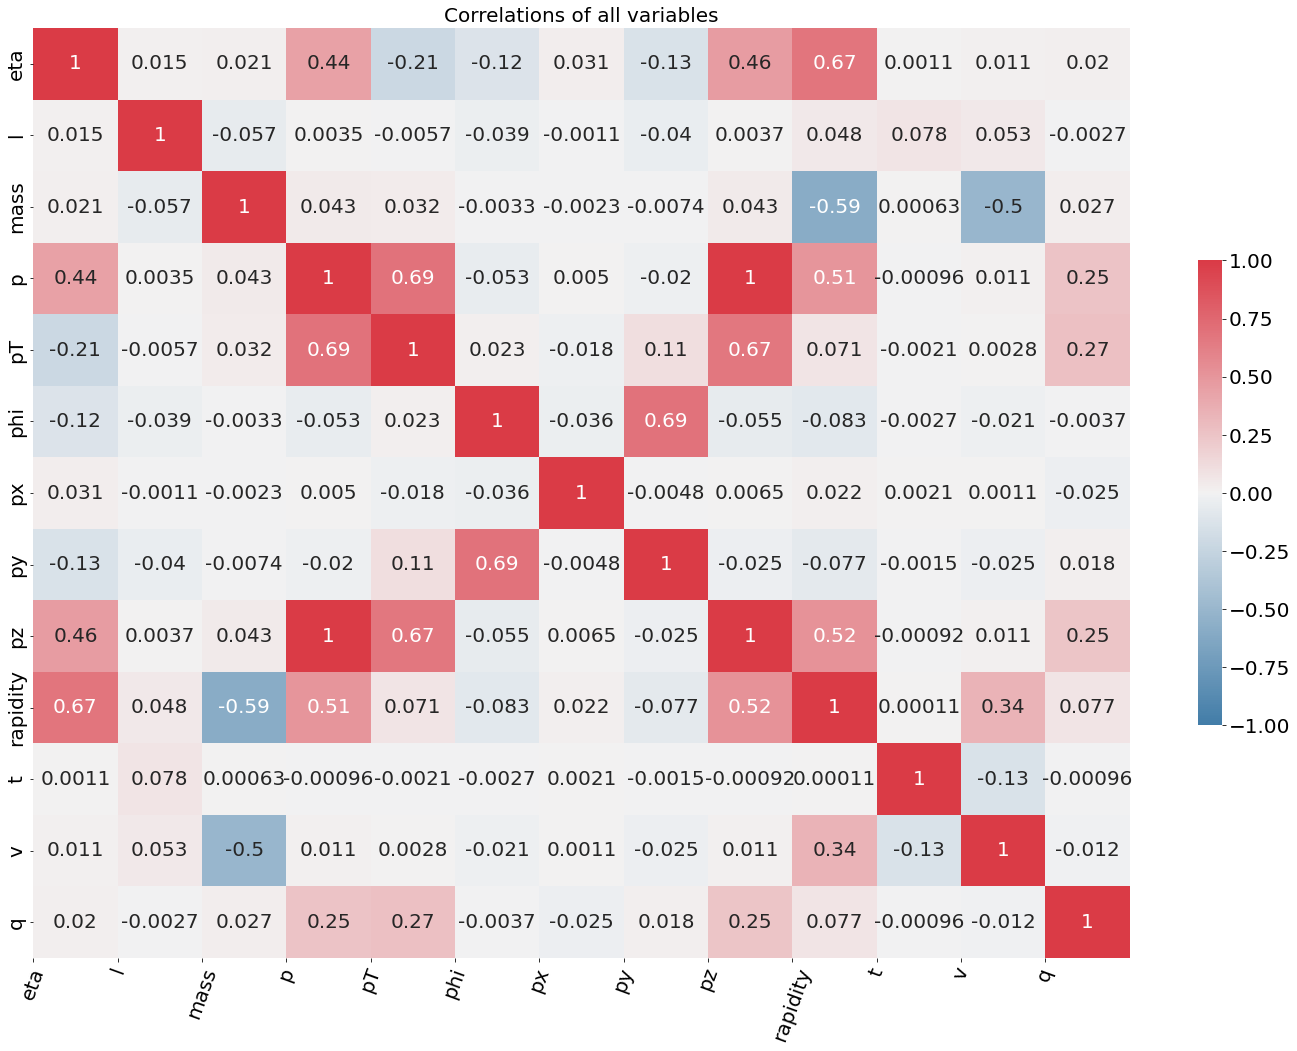

In [66]:
#correlation graph for background
correlation_graph(particles, variables_to_draw, 'Correlations of all variables')

The correlation graph of the background variables shows that: cosinefirst, cosinesecond, $p_T$, $p_z$, and $p$ is correlated with mass. To check whether it is a real correlation or a statistical fluctuation we make our own correlation function. 

## Correlations by formula
The following function calculates the correlation along with the standard error of the mean (SEM) of the input variable with all the other variables. The standard error of the mean is defined as $ SEM = \frac{\sigma}{\sqrt{n}}$. Here $\sigma$ is the standard deviation of a variable. It will put error bars on each bin.

The function accepts 3 variables, a data frame object in the first input, a list of strings to be correlated with the third input (a string).

In [67]:
def calculate_correlation(df, vars_to_corr, target_var) :

    from scipy.stats import sem

    mean = df[target_var].mean()
    sigma = df[target_var].std()

    correlation = []
    error = []

    for j in vars_to_corr :
        mean_j = df[j].mean()
        sigma_j = df[j].std()
        if (sigma != 0 and sigma_j != 0 ):
            cov = ((df[j] - mean_j) * (df[target_var] - mean)).mean() / (sigma*sigma_j)
            correlation.append(cov)
            error.append(sem(cov))
            
        else:
            print(str(vars_to_corr) + 'can\'t be calculated, sigma: ' + str(sigma) +' , sigma_j: ' +str(sigma_j))

    return correlation, error

In [68]:
# Provide the data frame object first, then also inside the brackets of list and then write the variable inside inverted commas ''.
# For signal
corr_particles, corr_particles_errors = calculate_correlation(particles, variables_to_draw, 'mass')

/opt/homebrew/Caskroom/miniforge/base/envs/cbm21/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/Caskroom/miniforge/base/envs/cbm21/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


/opt/homebrew/Caskroom/miniforge/base/envs/cbm21/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/var/folders/_8/1pnnpyz111s3q4bf02xypbgc0000gn/T/ipykernel_40542/3837629582.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(variables_to_draw,  rotation =90)


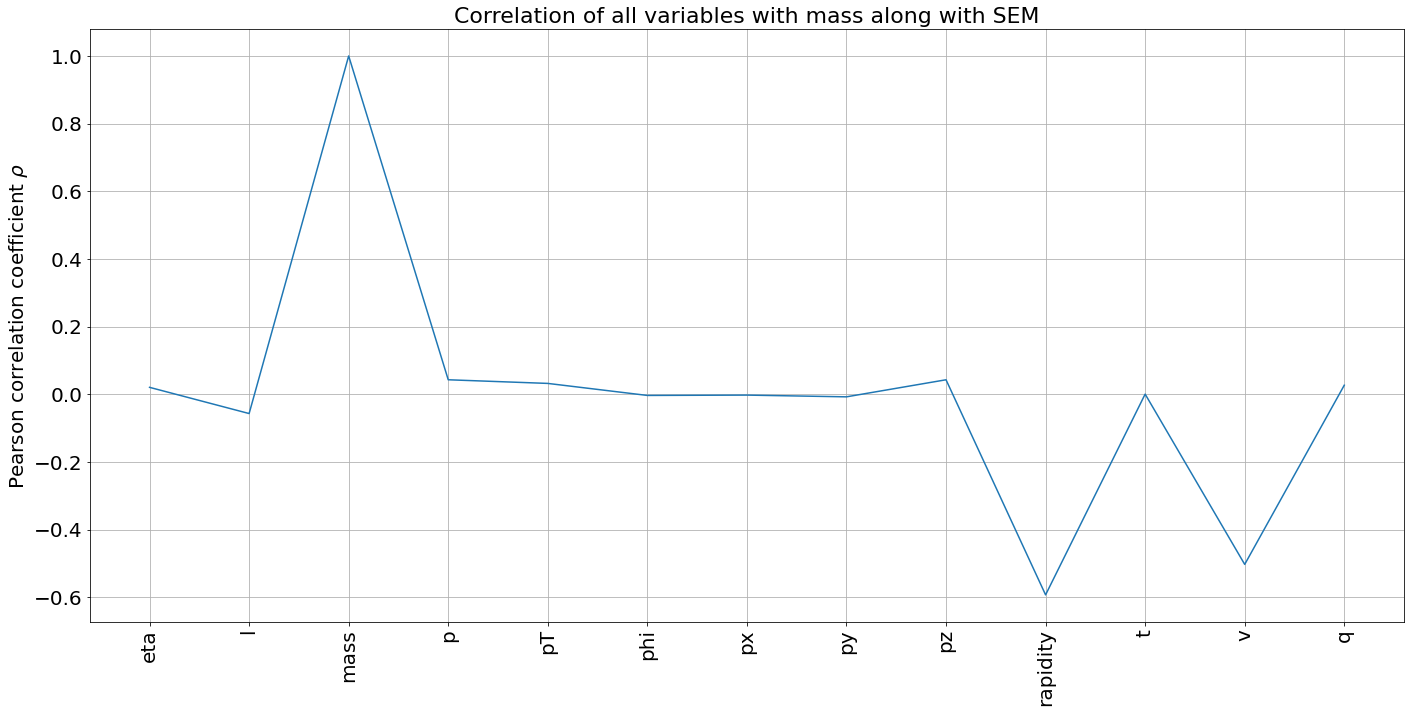

In [69]:
# Plotting the correlations of various variables with mass along with the errors
fig, ax = plt.subplots(figsize=(20,10))
plt.errorbar(variables_to_draw, corr_particles, yerr=corr_particles_errors, fmt='')
ax.grid(zorder=0)
ax.set_ylabel('Pearson correlation coefficient $\\rho$')
ax.set_xticklabels(variables_to_draw,  rotation =90)
# plt.legend(('signal','background'), fontsize = 15)
plt.tight_layout()
title = 'Correlation of all variables with mass along with SEM'
plt.title(title, fontsize = 22)
plt.rcParams.update({'font.size': 20})
fig.savefig(directory+'img/correlations/'+title.replace(' ', '_')+'.png', bbox_inches='tight')
fig.savefig(directory+'img/correlations/'+title.replace(' ', '_')+'.pdf', bbox_inches='tight')

We'll take a closer look at the correlations between the mass and: pseudorapidity, cosinecut, pT, pz and p in the pt 2 notebook <link>